# EDA on NY Times COVID-19 Dataset.
EDA on a released dataset from New York Times for COVID-19.  
https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

## Load the Data

In [2]:
county_df = pd.read_csv('../data/raw/us-counties.csv')
state_df = pd.read_csv('../data/raw/us-states.csv')

## Pandas Profiler
Build-in Quick Pandas Reporting Tool

In [3]:
county_profile = ProfileReport(county_df)

C:\Users\patri\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [4]:
county_profile

Number of variables,6
Number of observations,35698
Total Missing (%),0.2%
Total size in memory,1.6 MiB
Average record size in memory,48.0 B
Numeric,2
Categorical,3
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [5]:
state_profile = ProfileReport(state_df)

C:\Users\patri\Anaconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [6]:
state_profile

Number of variables,5
Number of observations,1884
Total Missing (%),0.0%
Total size in memory,73.7 KiB
Average record size in memory,40.1 B
Numeric,2
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,1


## Examine the Data
First look at data.

In [7]:
county_df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [8]:
state_df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


### .info() and .shape to see length and dtypes

In [9]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 6 columns):
date      35698 non-null object
county    35698 non-null object
state     35698 non-null object
fips      35180 non-null float64
cases     35698 non-null int64
deaths    35698 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ MB


In [10]:
county_df.dtypes

date       object
county     object
state      object
fips      float64
cases       int64
deaths      int64
dtype: object

In [11]:
county_df.shape

(35698, 6)

In [12]:
state_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1884 entries, 0 to 1883
Data columns (total 5 columns):
date      1884 non-null object
state     1884 non-null object
fips      1884 non-null int64
cases     1884 non-null int64
deaths    1884 non-null int64
dtypes: int64(3), object(2)
memory usage: 73.7+ KB


In [13]:
state_df.dtypes

date      object
state     object
fips       int64
cases      int64
deaths     int64
dtype: object

In [14]:
state_df.shape

(1884, 5)

### Check for nulls

#### County Level

In [15]:
county_df.isnull().any()

date      False
county    False
state     False
fips       True
cases     False
deaths    False
dtype: bool

In [16]:
county_df.isnull().sum().sort_values(ascending = False)

fips      518
deaths      0
cases       0
state       0
county      0
date        0
dtype: int64

In [17]:
county_df.fips.isnull().value_counts()

False    35180
True       518
Name: fips, dtype: int64

In [18]:
missing_fips = county_df[county_df.fips.isnull()==True]
missing_fips.county.value_counts()

### missing fips mainly due to unknown county. (some cases from new york city & kansas city)

Unknown          465
New York City     36
Kansas City       17
Name: county, dtype: int64

In [19]:
# find distribution of which states have unknown counties
missing_fips[missing_fips.county=='Unknown']['state'].value_counts()

Rhode Island                36
New Jersey                  25
Puerto Rico                 24
Virgin Islands              23
Guam                        22
Maine                       21
Massachusetts               21
Louisiana                   19
Kentucky                    18
Tennessee                   18
Missouri                    17
Georgia                     17
Nevada                      17
Arkansas                    17
Florida                     15
Minnesota                   15
Colorado                    15
Vermont                     14
Hawaii                      14
Illinois                    14
California                  13
Michigan                    11
Utah                        11
Northern Mariana Islands     9
Connecticut                  7
Nebraska                     5
Mississippi                  4
Pennsylvania                 3
Arizona                      3
New York                     3
Virginia                     3
New Hampshire                2
New Mexi

In [20]:
county_df[county_df.county == 'New York City']['county'].value_counts()

New York City    36
Name: county, dtype: int64

In [21]:
county_df[county_df.county=='Kansas City']['county'].value_counts()

Kansas City    17
Name: county, dtype: int64

#### State Level

In [22]:
state_df.isnull().any()

date      False
state     False
fips      False
cases     False
deaths    False
dtype: bool

### Check for duplicates

In [23]:
county_df.duplicated().sum()

0

In [24]:
state_df.duplicated().sum()

0

### Check Date Range Records

C:\Users\patri\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


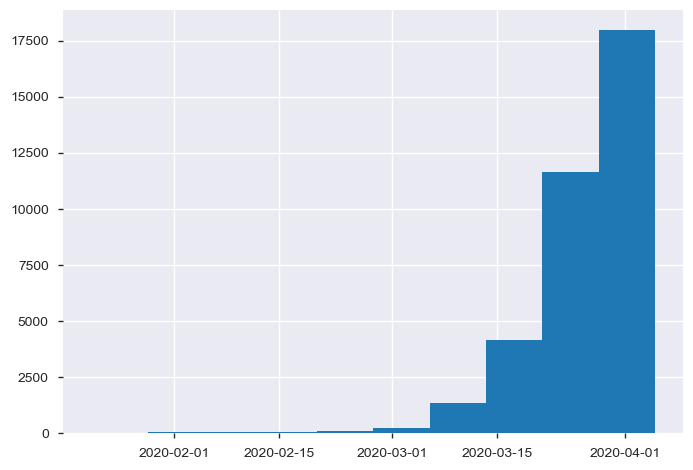

In [25]:
pd.to_datetime(county_df.date).hist()

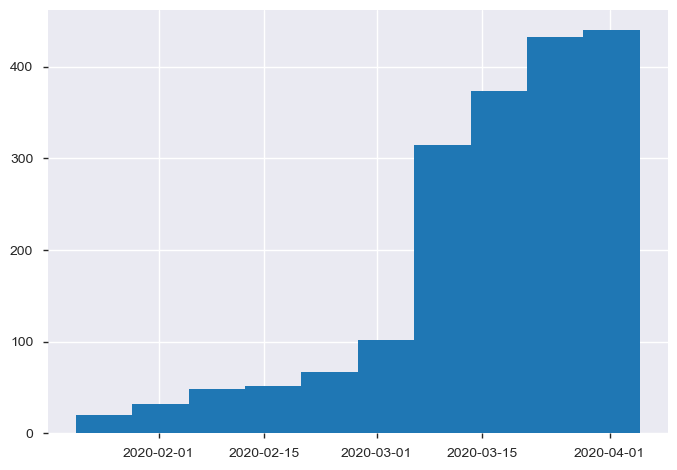

In [26]:
pd.to_datetime(state_df.date).hist()

### Identify Numerical vs Categorical Variables

In [27]:
county_df.columns

Index(['date', 'county', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [28]:
numeric_cols = ['fips','cases','deaths']
categorical_cols = ['date','county','state']

### Summarize Basic Stats with .describe() separating numeric vs categorical

In [29]:
county_df.describe(include = [np.number])

,fips,cases,deaths
count,35180.000000,35698.000000,35698.000000
mean,29323.382433,69.399798,1.503838
std,15614.724435,904.122068,26.797397
min,1001.000000,0.000000,0.000000
25%,17093.000000,1.000000,0.000000
50%,28113.000000,4.000000,0.000000
75%,42101.000000,15.000000,0.000000
max,56043.000000,67552.000000,2472.000000


In [30]:
county_df.describe(include = ['O'])

,date,county,state
count,35698,35698,35698
unique,76,1512,55
top,2020-04-05,Washington,Georgia
freq,2444,474,2088


In [31]:
state_df.describe(include=[np.number])

,fips,cases,deaths
count,1884.000000,1884.000000,1884.000000
mean,30.859342,1315.561040,29.280786
std,18.041872,6777.046002,180.711444
min,1.000000,1.000000,0.000000
25%,17.000000,7.000000,0.000000
50%,30.000000,66.500000,0.000000
75%,46.000000,495.750000,9.000000
max,78.000000,122911.000000,4161.000000


In [32]:
state_df.describe(include=['O'])

,date,state
count,1884,1884
unique,76,55
top,2020-03-29,Washington
freq,55,76


In [33]:
state_df.state.value_counts(sort=True).head(15)

## District of Columbia, Guam, Mariana Island, Virgin Island, Puerto Rico (Extra 5 states)

Washington       76
Illinois         73
California       72
Arizona          71
Massachusetts    65
Wisconsin        61
Texas            54
Nebraska         49
Utah             41
Oregon           38
New York         36
Florida          36
Rhode Island     36
New Hampshire    35
Georgia          35
Name: state, dtype: int64

### Visualize Overall Target Variables (Deaths and Cases)

#### State Level

In [34]:
def plot_target(df,state = False, county = False):
    confirmed_total_df = df.groupby(['date']).agg({'cases':['sum']})
    fatalities_total_df = df.groupby(['date']).agg({'deaths':['sum']})
    totals_df = confirmed_total_df.join(fatalities_total_df)
    
    if state == True:
        state_name =f'{df.reset_index().state[0]} - ' 
    else:
        state_name =""
        
    if county == True:
        county_name =f' {df.reset_index().county[0]} - '
    else:
        county_name =""
        
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
    totals_df.plot(ax=ax1)
    ax1.set_title(f'{state_name}{county_name}Confirmed Cases',size =15)
    ax1.set_ylabel('Number of Cases', size=13)
    ax1.set_xlabel('Date',size =13)


    fatalities_total_df.plot(ax=ax2, color = 'red')
    ax2.set_title(f"{state_name}{county_name}Deceased Cases", size=15)
    ax2.set_ylabel("Number of Cases", size=13)
    ax2.set_xlabel("Date", size=13)
    

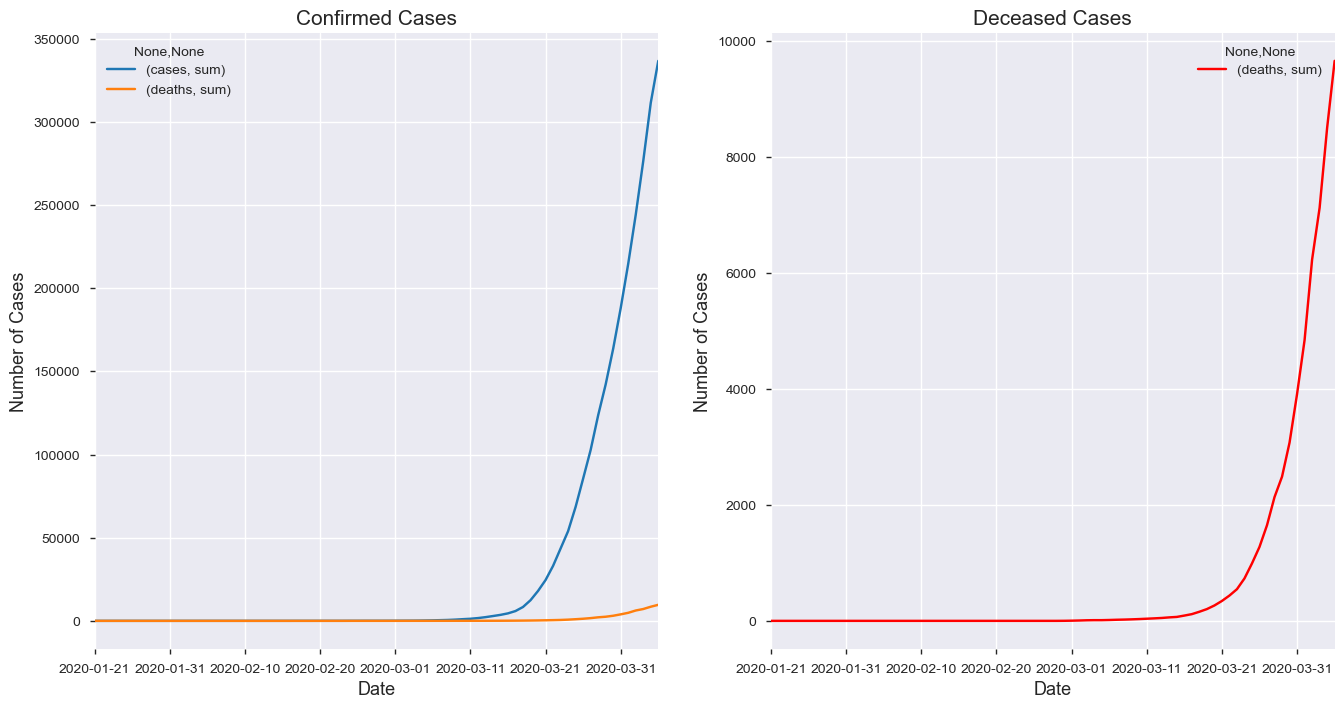

In [35]:
plot_target(state_df)

In [36]:
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# sns.boxplot(state_df.cases)
# plt.subplot(1,2,2)
# sns.distplot(state_df.cases, bins=20)
# plt.show()

## Not right plot



In [37]:
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# sns.boxplot(state_df.deaths)
# plt.subplot(1,2,2)
# sns.distplot(state_df.deaths, bins=20)
# plt.show()

## Not right plot

#### County Level

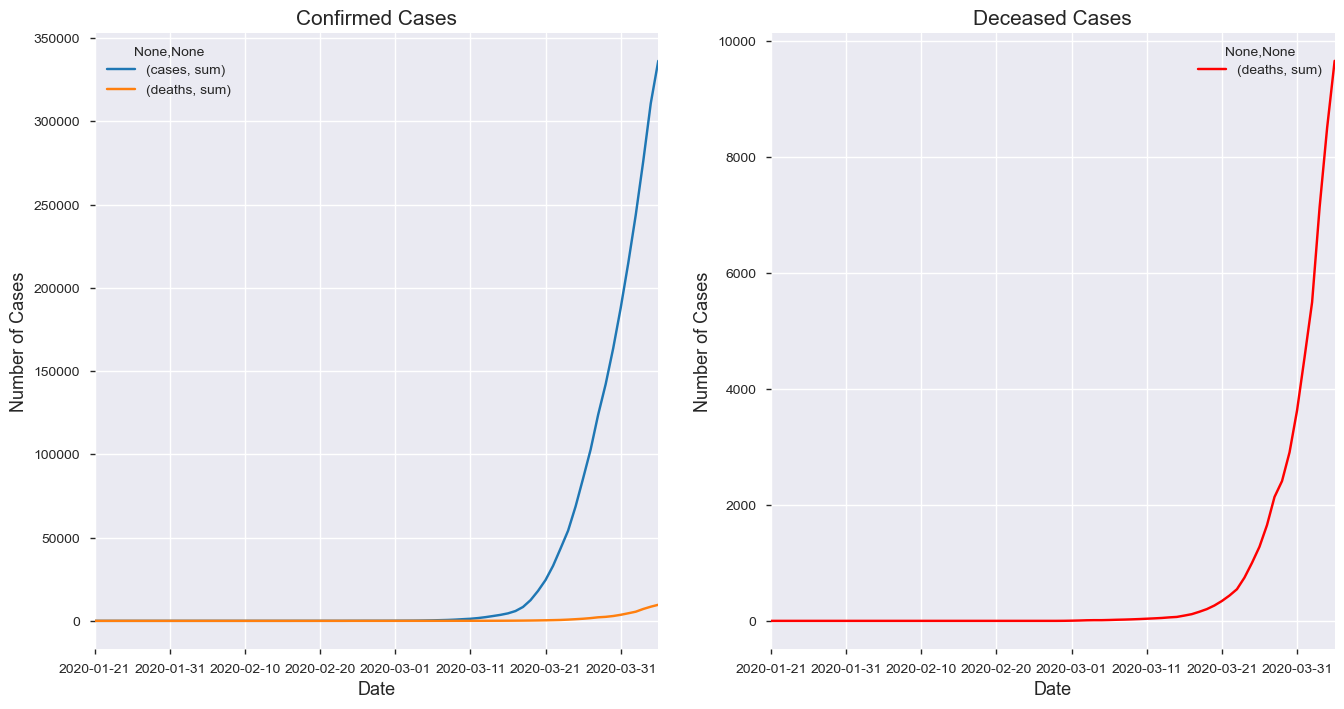

In [38]:
plot_target(county_df)

In [39]:
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# sns.boxplot(county_df.deaths)
# plt.subplot(1,2,2)
# sns.distplot(county_df.deaths, bins=20)
# plt.show()

## Not right plot

In [40]:
# plt.figure(figsize=(14,6))
# plt.subplot(1,2,1)
# sns.boxplot(county_df.deaths)
# plt.subplot(1,2,2)
# sns.distplot(county_df.deaths, bins=20)
# plt.show()

## Not right plot

### Use IQR rule to identify potential outliers

In [41]:
stat = state_df.deaths.describe()
IQR = stat['75%']- stat['25%']
upper = stat['75%'] + 1.5 * IQR
lower = stat['25%'] + 1.5 * IQR
print(f'The upper and lower bounds for suspected IQR outliers are {upper} and {lower}')

The upper and lower bounds for suspected IQR outliers are 22.5 and 13.5


In [42]:
# stat_2 = county_df.deaths.describe()
# IQR_county = stat_2['75%']- stat_2['25%']
# upper_county = stat_2['75%'] + 1.5 * IQR_county
# lower_county = stat_2['25%'] + 1.5 * IQR_county
# print(f'The upper and lower bounds for suspected IQR outliers are {upper_county} and {lower_county}')

#### This method is not viable at county level due to high frequency of zero cases

In [43]:
#checking for potential outliers below lower bound
state_df[state_df.deaths < lower]

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
1873,2020-04-05,South Dakota,46,240,2
1876,2020-04-05,Utah,49,1605,8
1878,2020-04-05,Virgin Islands,78,42,0
1881,2020-04-05,West Virginia,54,324,3


In [44]:
#checking for potential outliers above upper bound
state_df[state_df.deaths > upper]


## all can be legitmate, seems like there is various spikes in deaths.

,date,state,fips,cases,deaths
492,2020-03-10,Washington,53,279,24
536,2020-03-11,Washington,53,338,29
583,2020-03-12,Washington,53,419,32
634,2020-03-13,Washington,53,511,37
686,2020-03-14,Washington,53,609,40
...,...,...,...,...,...
1874,2020-04-05,Tennessee,47,3538,50
1875,2020-04-05,Texas,48,7094,137
1879,2020-04-05,Virginia,51,2637,52
1880,2020-04-05,Washington,53,7984,344


In [45]:
state_df.loc[state_df.deaths > upper,'state'].value_counts()


Washington        27
New York          19
California        17
Georgia           15
New Jersey        14
Louisiana         14
Michigan          13
Florida           12
Massachusetts     11
Colorado          11
Illinois          11
Indiana           10
Connecticut       10
Texas             10
Pennsylvania      10
Ohio               9
Virginia           7
Wisconsin          6
Arizona            6
Nevada             6
Oklahoma           6
Tennessee          5
Alabama            5
Maryland           5
South Carolina     5
Kentucky           4
Missouri           4
Mississippi        4
North Carolina     2
Minnesota          2
Oregon             2
Rhode Island       1
Kansas             1
Name: state, dtype: int64

In [46]:
suspected_state = ['Rhode Island','Kansas','Oregon']

In [47]:
state_df[(state_df.deaths>upper)&(state_df.state.isin(suspected_state))]

,date,state,fips,cases,deaths
1813,2020-04-04,Oregon,41,999,26
1846,2020-04-05,Kansas,20,763,23
1868,2020-04-05,Oregon,41,1068,27
1871,2020-04-05,Rhode Island,44,922,25


### Plotting Per Feature

In [48]:
# def plot_feature(df,col):
#     '''Making plot for each features'''
#     plt.figure(figsize =(14,6))
#     plt.subplot(1,2,1)
#     if df[col].dtype == 'int64':
#         df[col].value_counts().sort_index().plot()
#     else: 
#         # change the categorical variable to category type and order their level by the mean in each category
        
#         mean = df.groupby(col)['deaths'].mean()
#         df[col] = df[col].astype('category')
#         levels = mean.sort_values().index.tolist()
#         df[col].cat.reorder_categories(levels, inplace=True)
#         df[col].value_counts().plot()
#     plt.xticks(rotation = 45)
#     plt.xlabel(col)
#     plt.ylabel('Counts')
#     plt.subplot(1,2,2)
    
#     if df[col].dtype == 'int64' or col == 'companyId':
#         # plot the mean deaths for each category and fill between the (mean - std, mean + std)
#         mean = df.groupby(col)['deaths'].mean()
#         std = df.groupby(col)['deaths'].std()
#         mean.plot()
#         plt.fill_between(range(len(std.index)), mean.values-std.values, mean.values+std.values, alpha = 0.1)
    
#     else:
#         sns.boxplot(x = col, y = 'deaths', data =df)
#     plt.xticks(rotation =45)
#     plt.ylabel('Deaths')
#     plt.show()

In [49]:
# for i in state_df.columns:
   
#     plot_feature(state_df,i)

### Function for target label encoding

In [50]:
# def encode_label(df, col):
#     # encode the categories using average deaths for each category to replace label
#     cat_dict = {}
#     cats = df[col].cat.categories.tolist()
#     for cat in cats:
#         cat_dict[cat] = df[df[col] == cat]['deaths'].mean()
#     df[col] = df[col].map(cat_dict)
    

In [51]:
# for col in state_df.columns:
#     if state_df[col].dtype.name == 'category':
#         encode_label(state_df,col)

### Plotting Per Top 10 State

In [52]:
# create dataframe of top aggregated deaths by state in US
top_states_df = state_df.groupby('state').agg('sum')

In [53]:
top_states_df.deaths.sort_values(ascending=False).head(20)
# Looks right according to the news

state
New York         21799
New Jersey        4469
Washington        3847
Michigan          3353
Louisiana         2978
California        2513
Georgia           1652
Illinois          1501
Florida           1313
Massachusetts     1256
Connecticut        966
Colorado           896
Pennsylvania       830
Texas              766
Indiana            733
Ohio               677
Virginia           387
Wisconsin          387
Arizona            340
Nevada             328
Name: deaths, dtype: int64

In [54]:
top_states = top_states_df.deaths.sort_values(ascending=False).index[0:10]

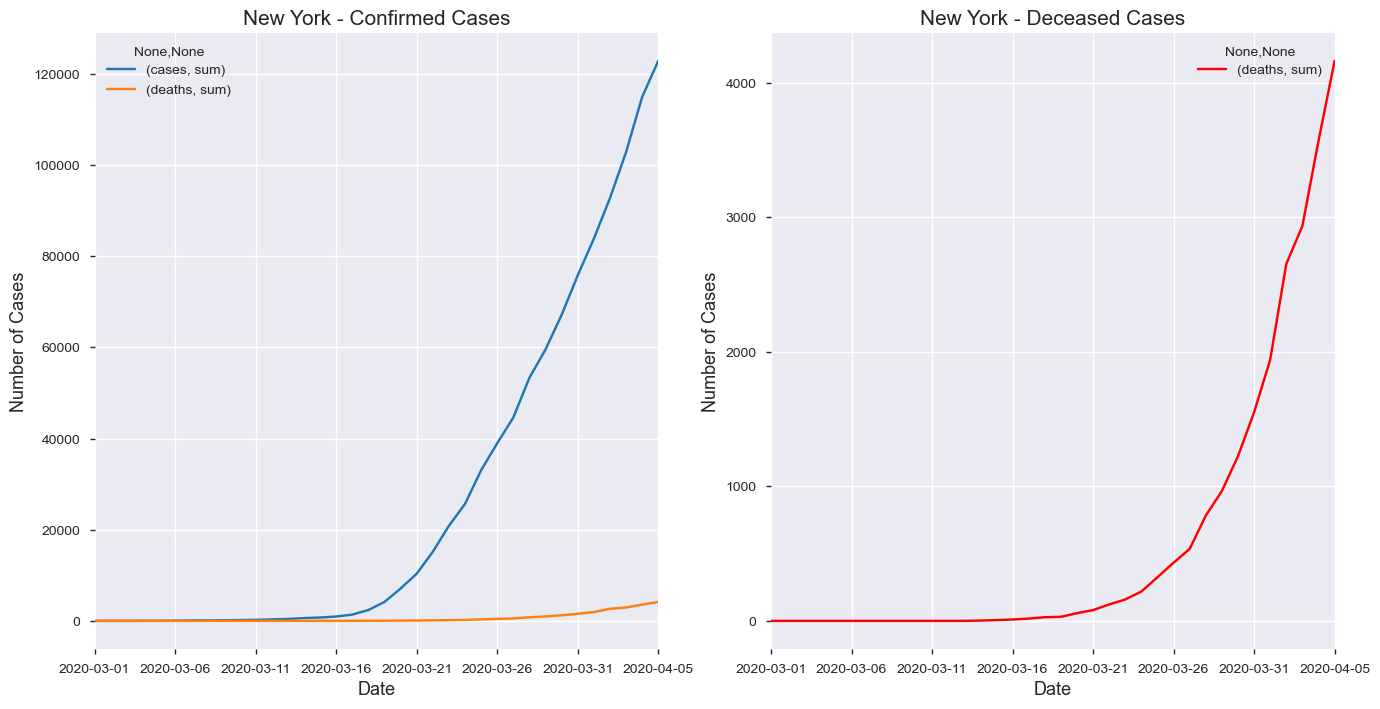

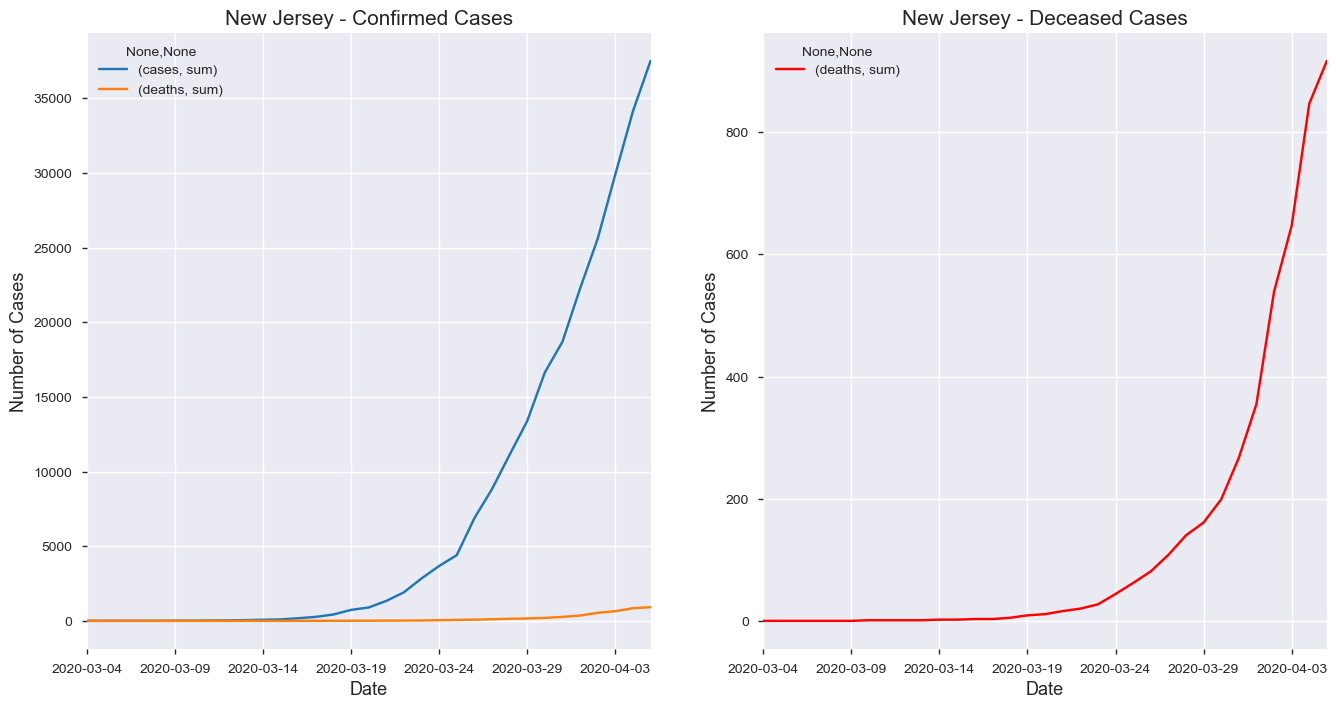

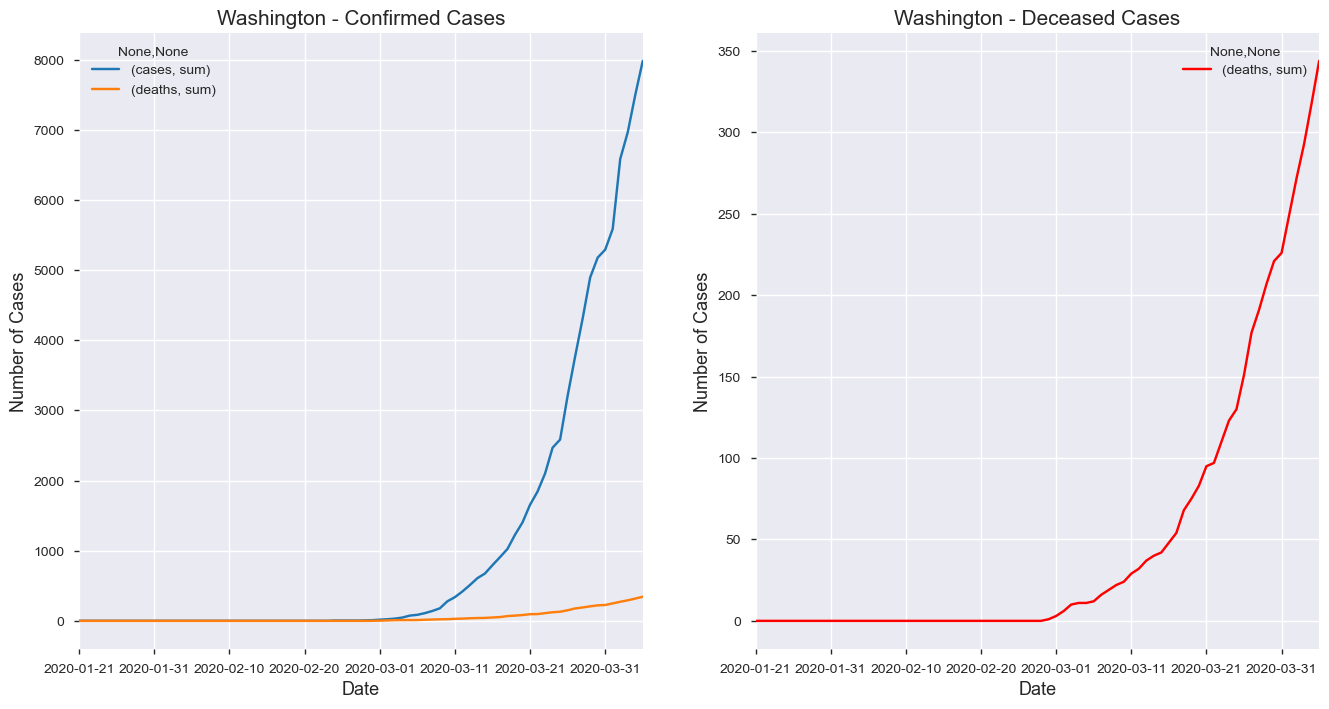

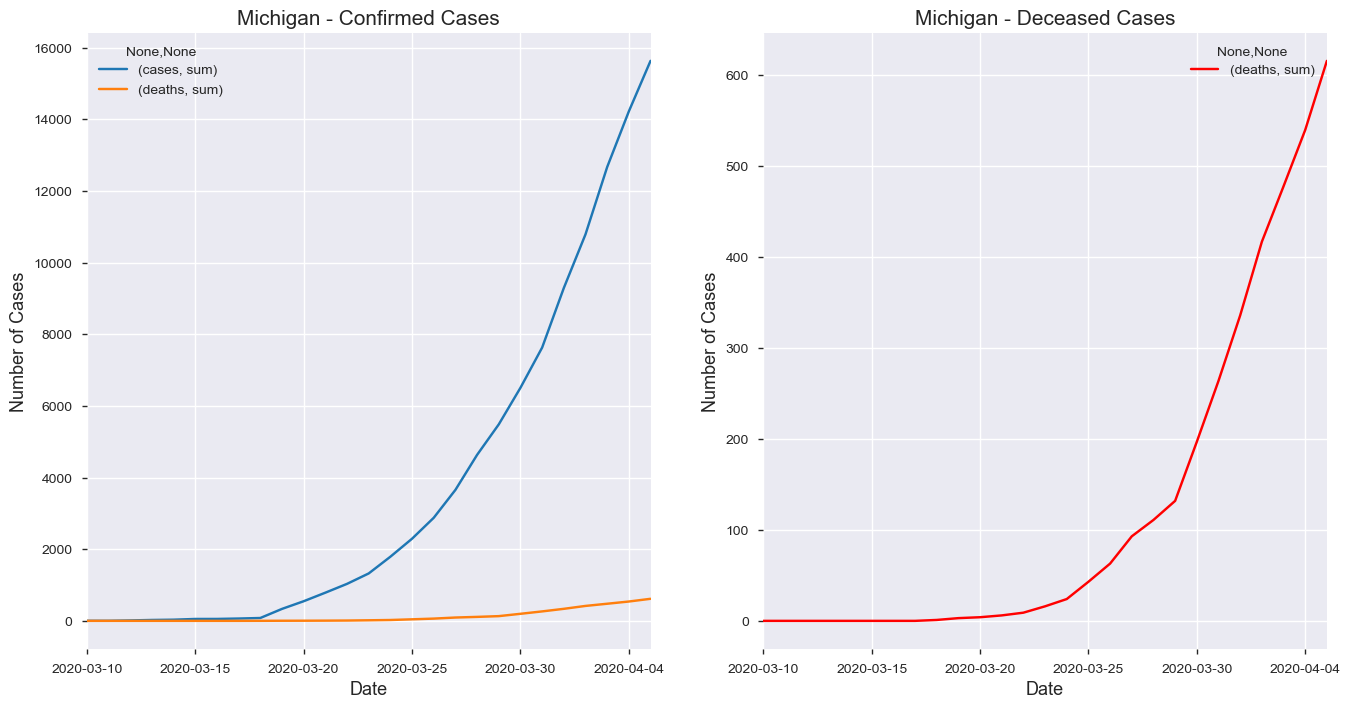

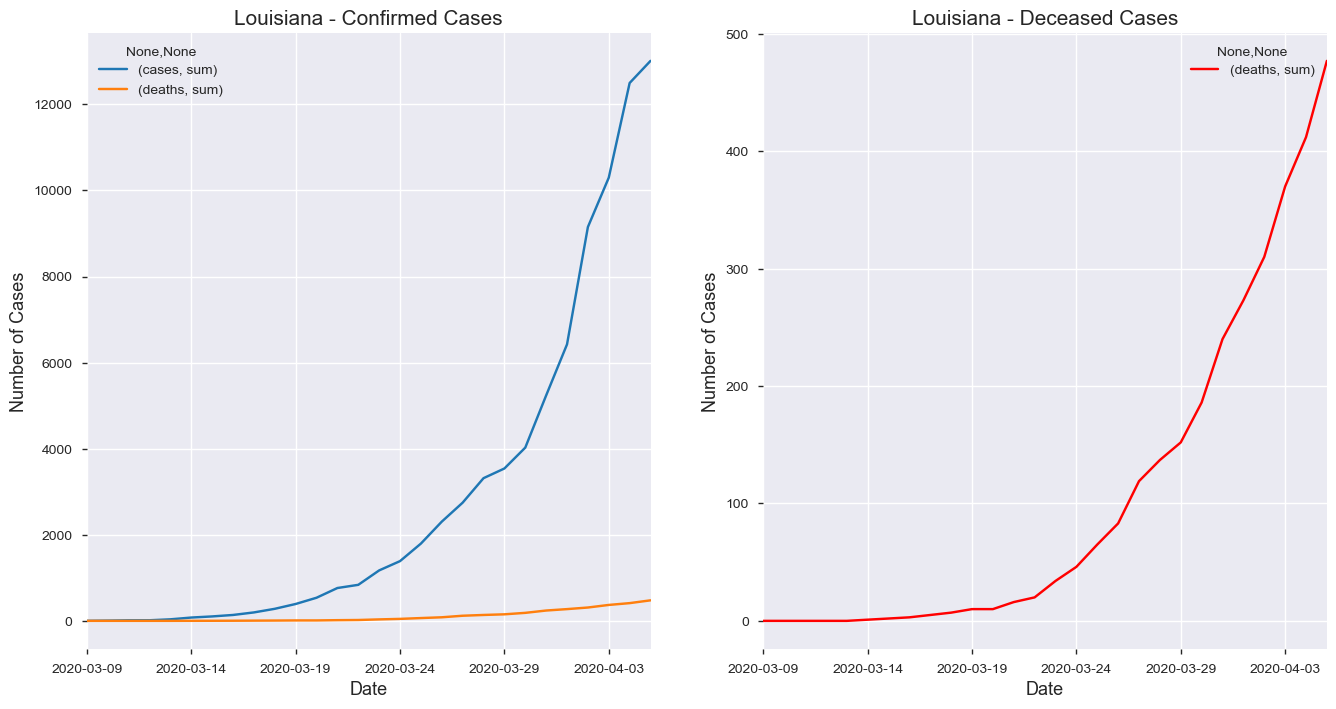

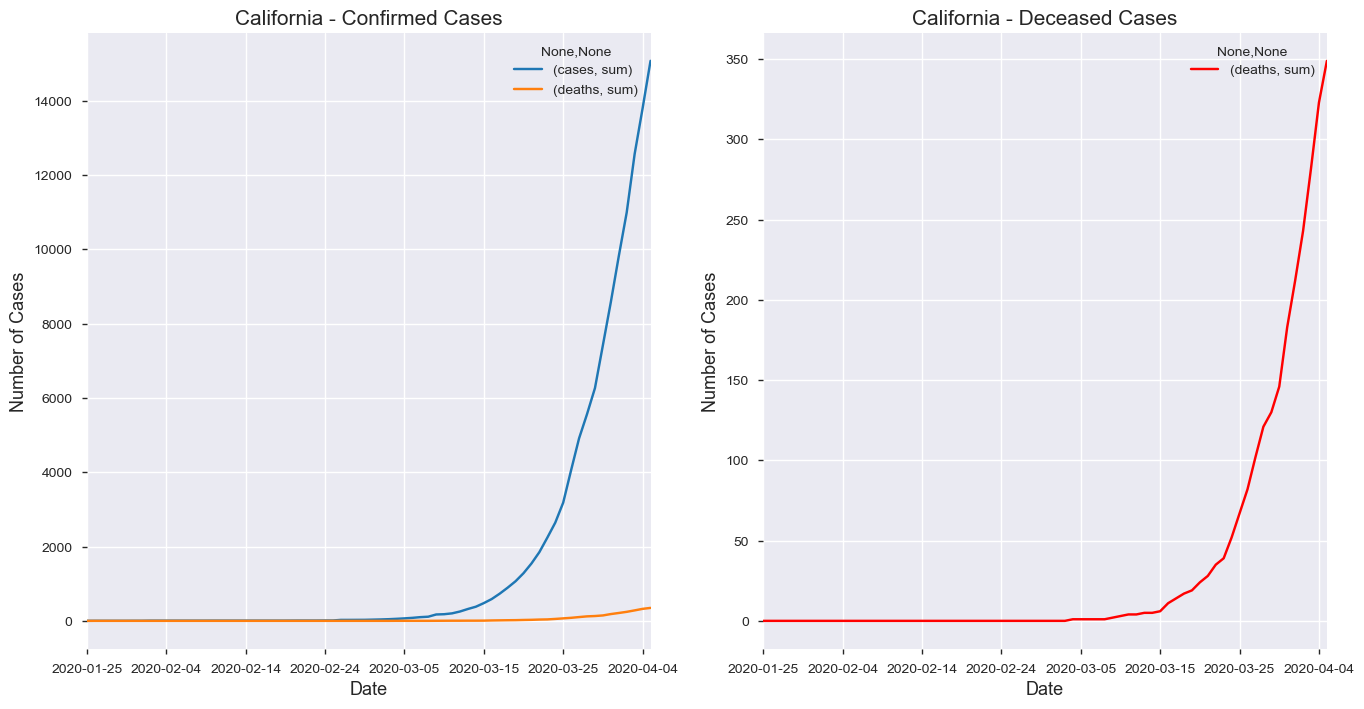

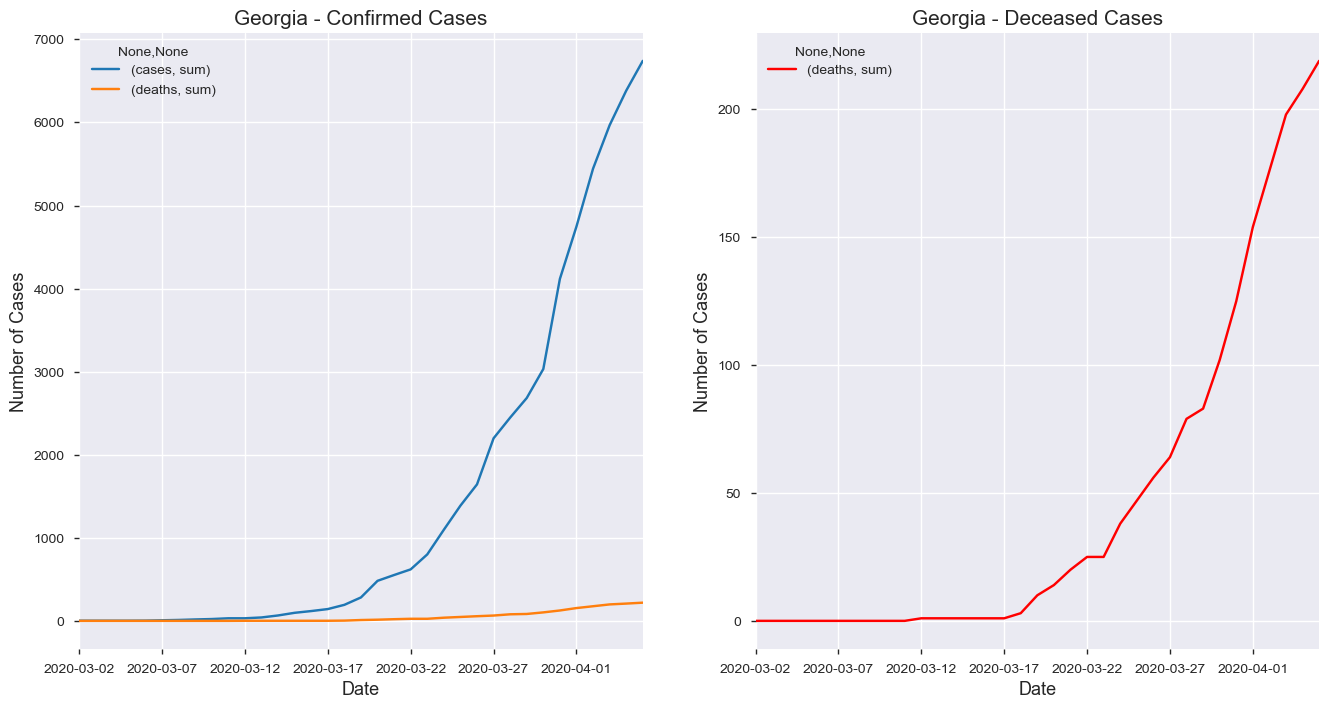

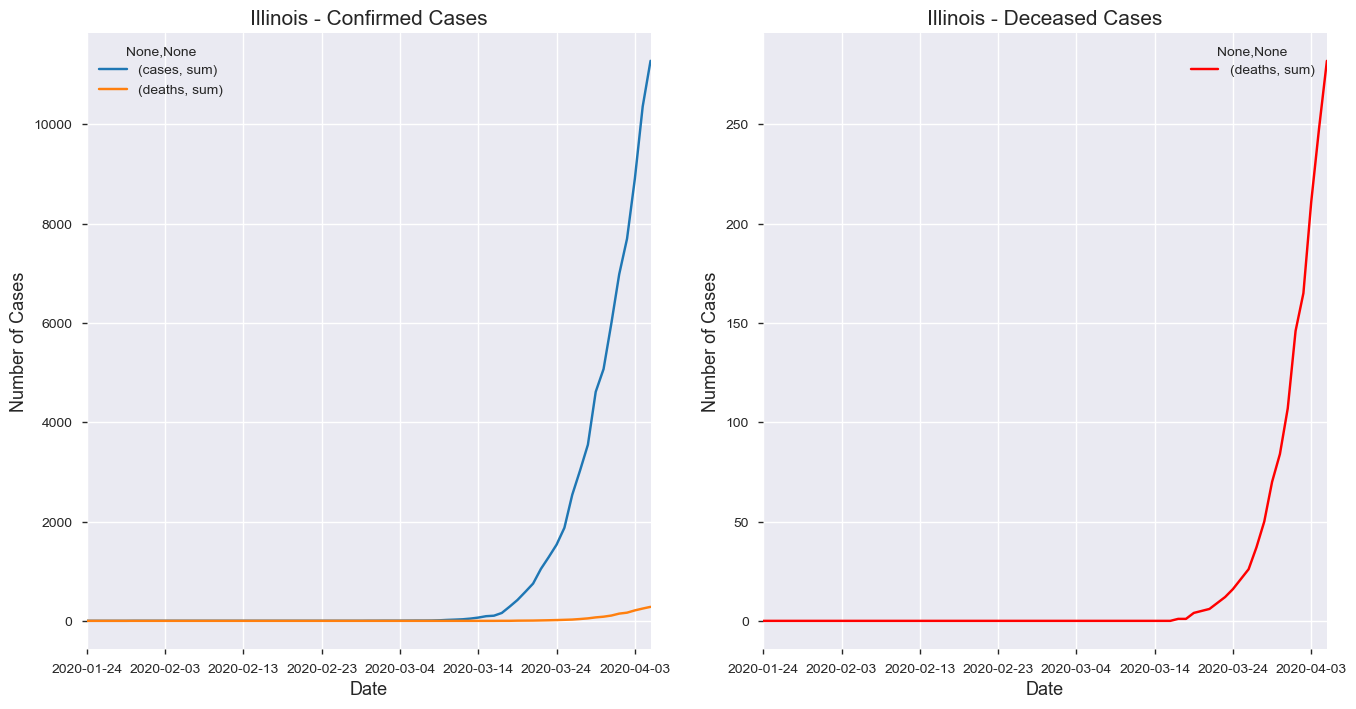

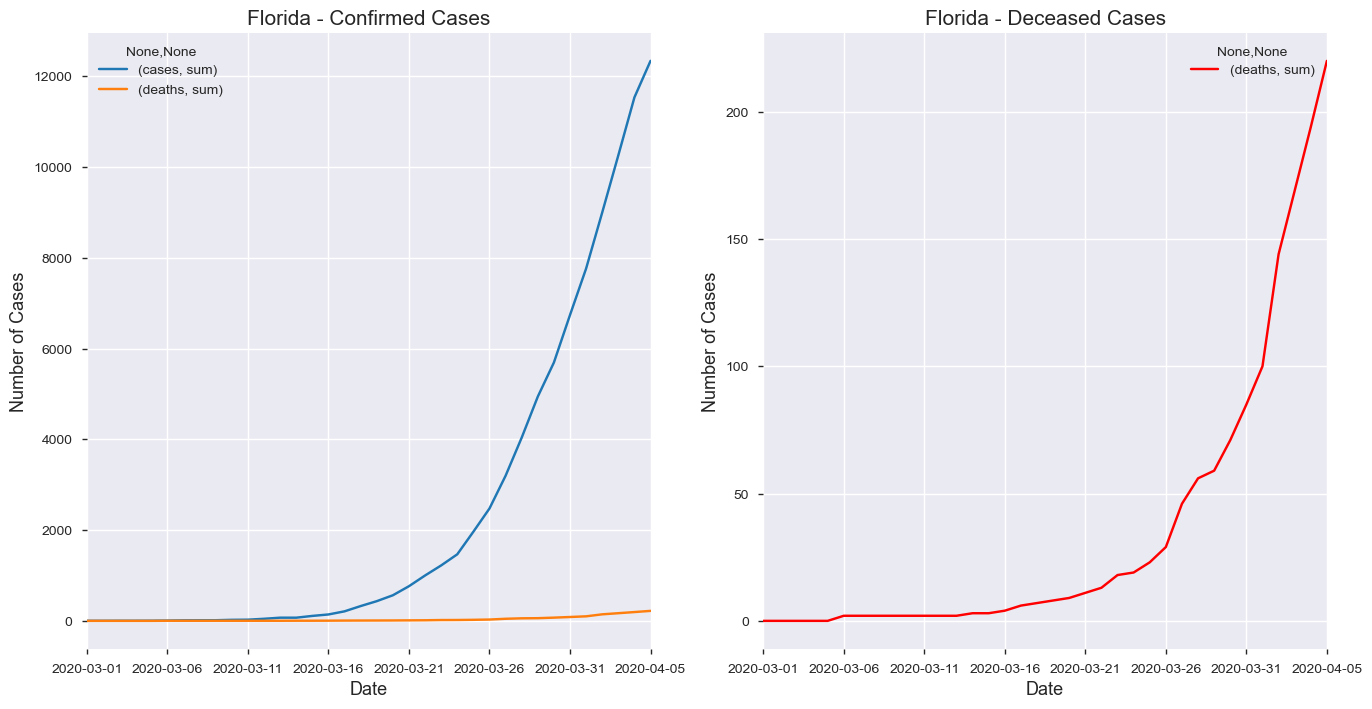

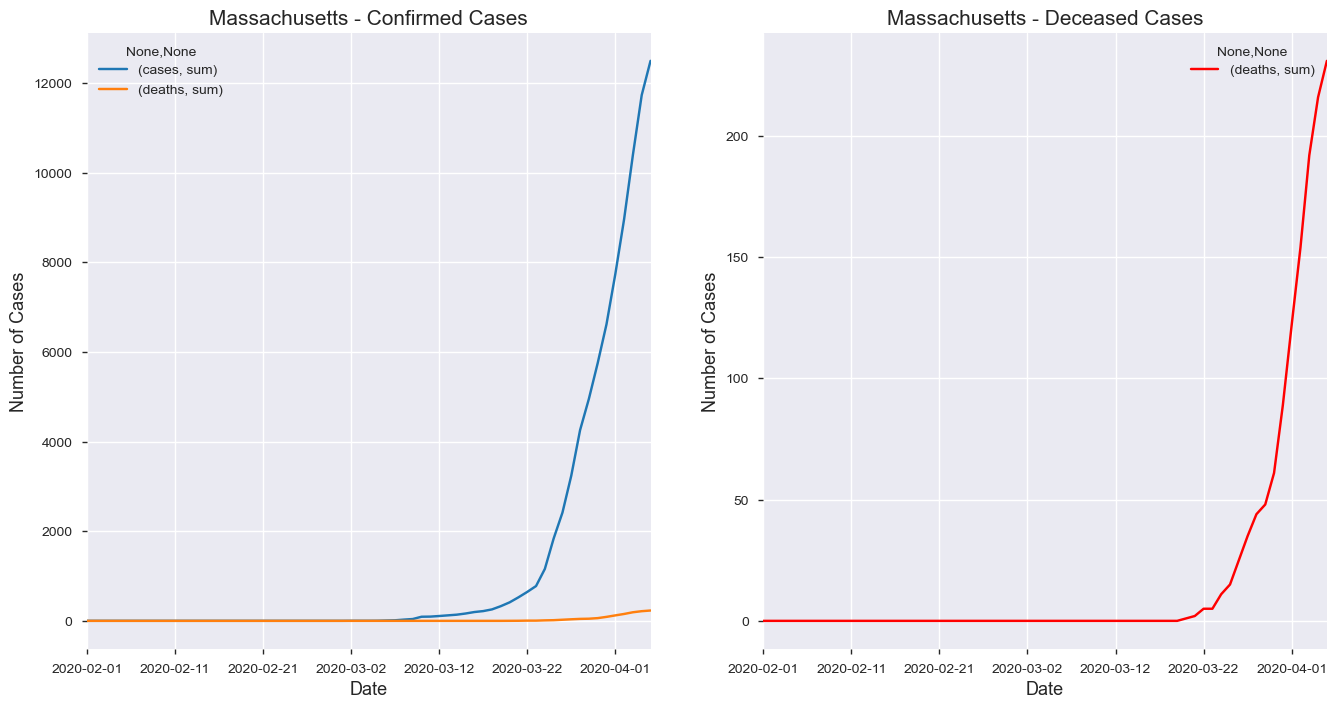

In [55]:
for i in range(0,len(top_states)):
    plot_target(state_df[state_df.state == top_states[i]],state=True)

### Plotting Per Top 20 Counties


In [56]:
# create dataframe of top aggregated deaths by state in US
top_counties_df = county_df.groupby('county').agg('sum')

In [57]:
top_counties_df.deaths.sort_values(ascending=False).drop(index = 'Unknown').head(20)
# Noted dropped Unknown category

county
New York City    14672
King              2779
Wayne             1534
Nassau            1392
Orleans           1279
Suffolk           1050
Bergen             995
Cook               958
Essex              946
Oakland            925
Jefferson          868
Los Angeles        749
Westchester        647
Middlesex          628
Fairfield          540
Macomb             475
Snohomish          457
Santa Clara        446
Clark              408
Orange             352
Name: deaths, dtype: int64

In [58]:
top_counties = top_counties_df.deaths.sort_values(ascending=False).drop(index = 'Unknown').index[0:20]

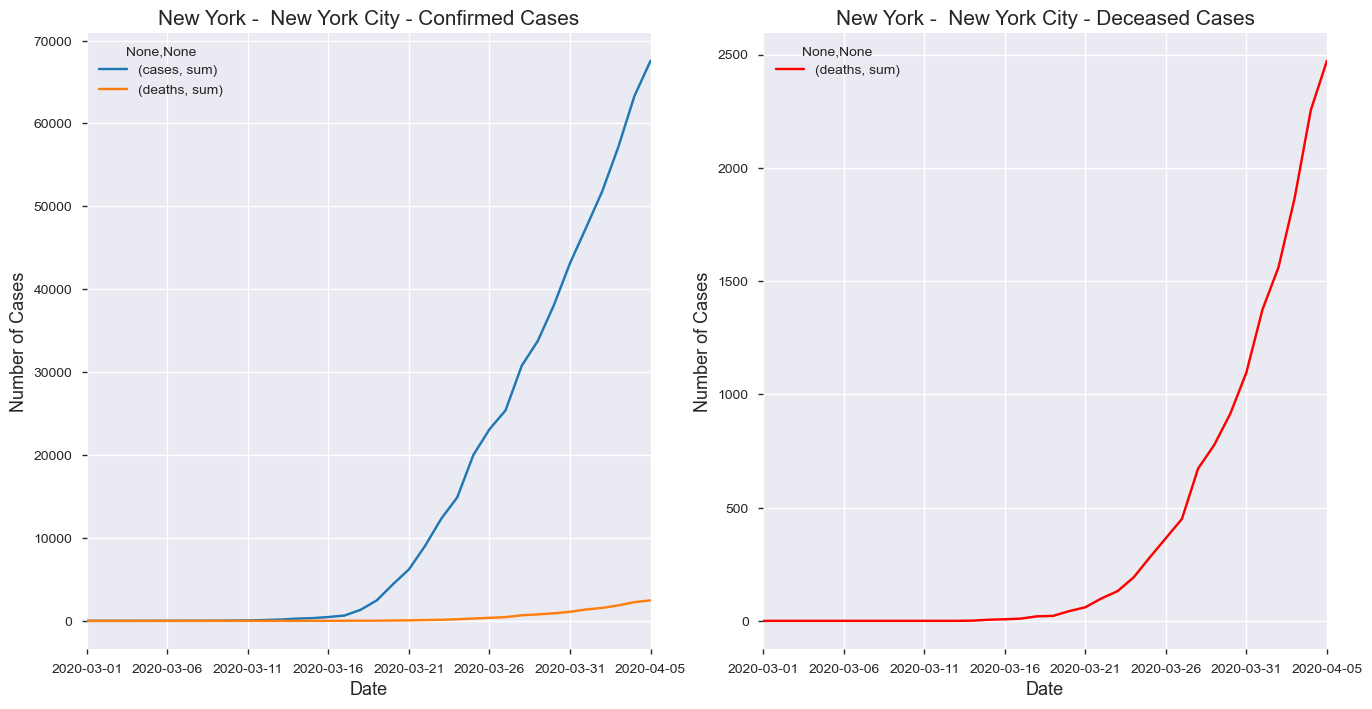

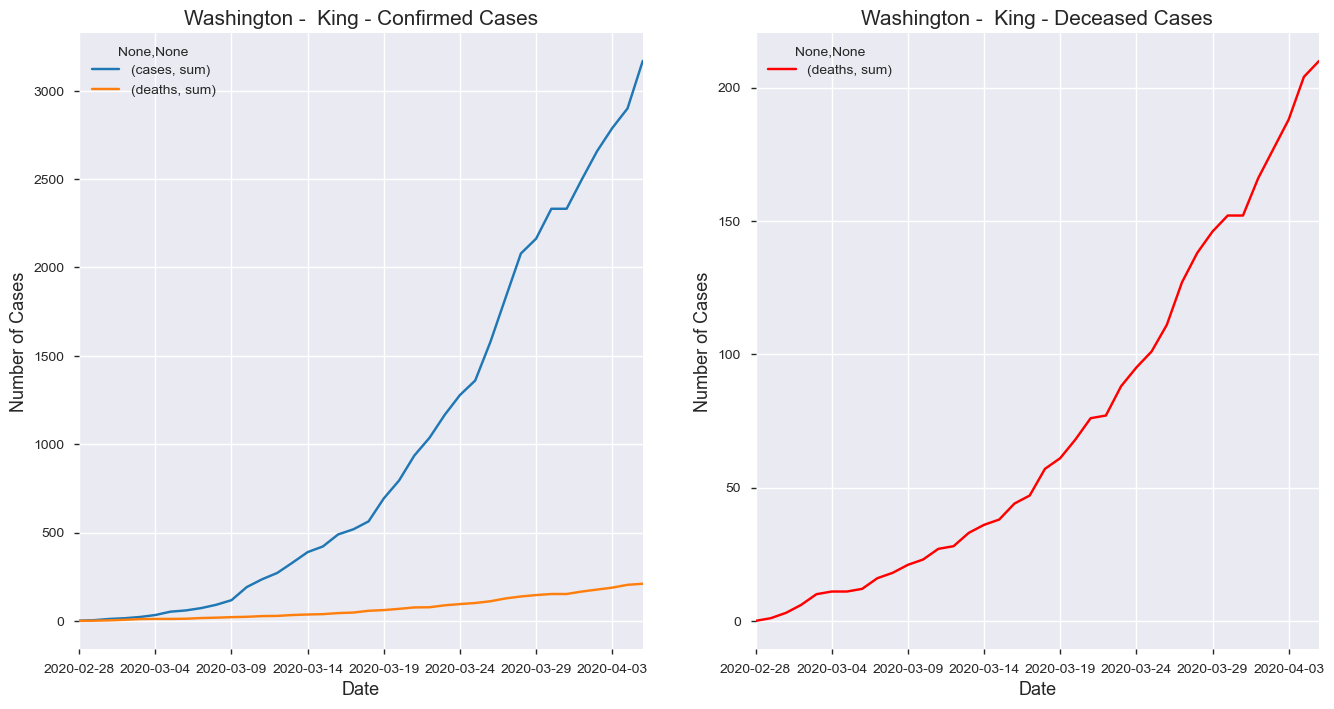

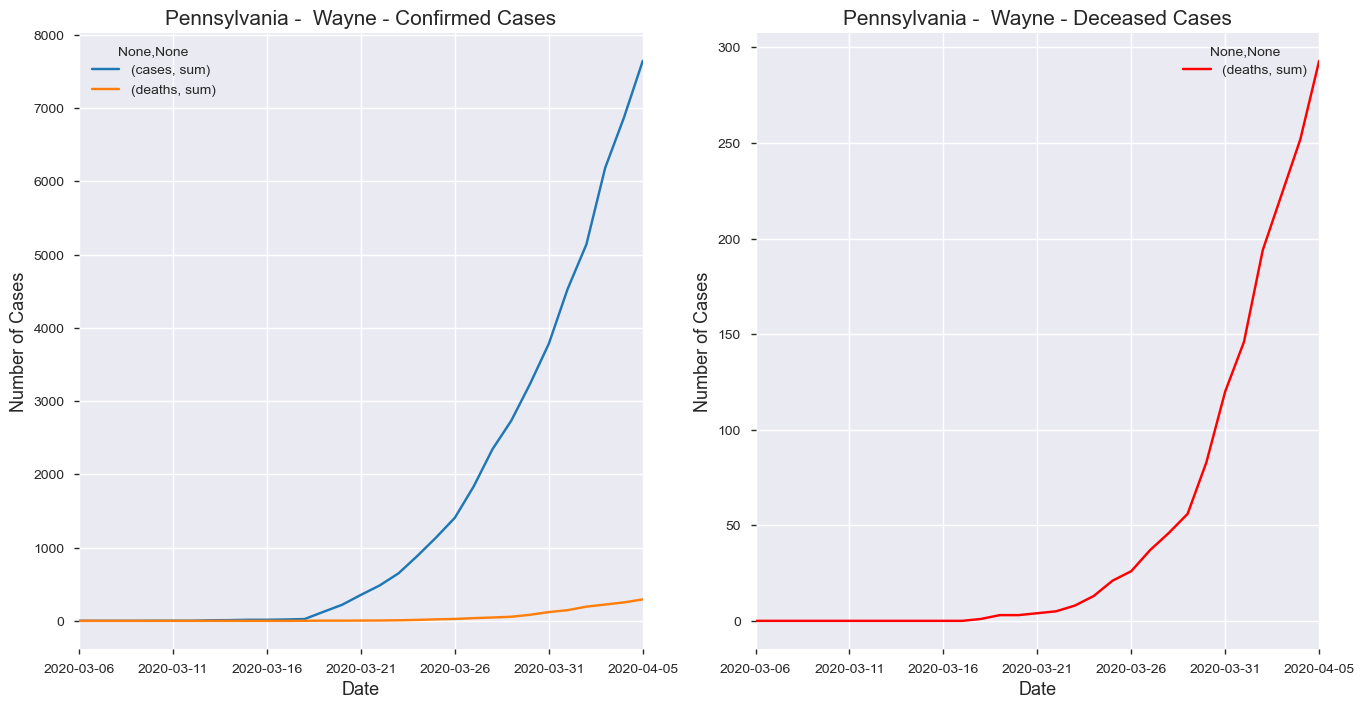

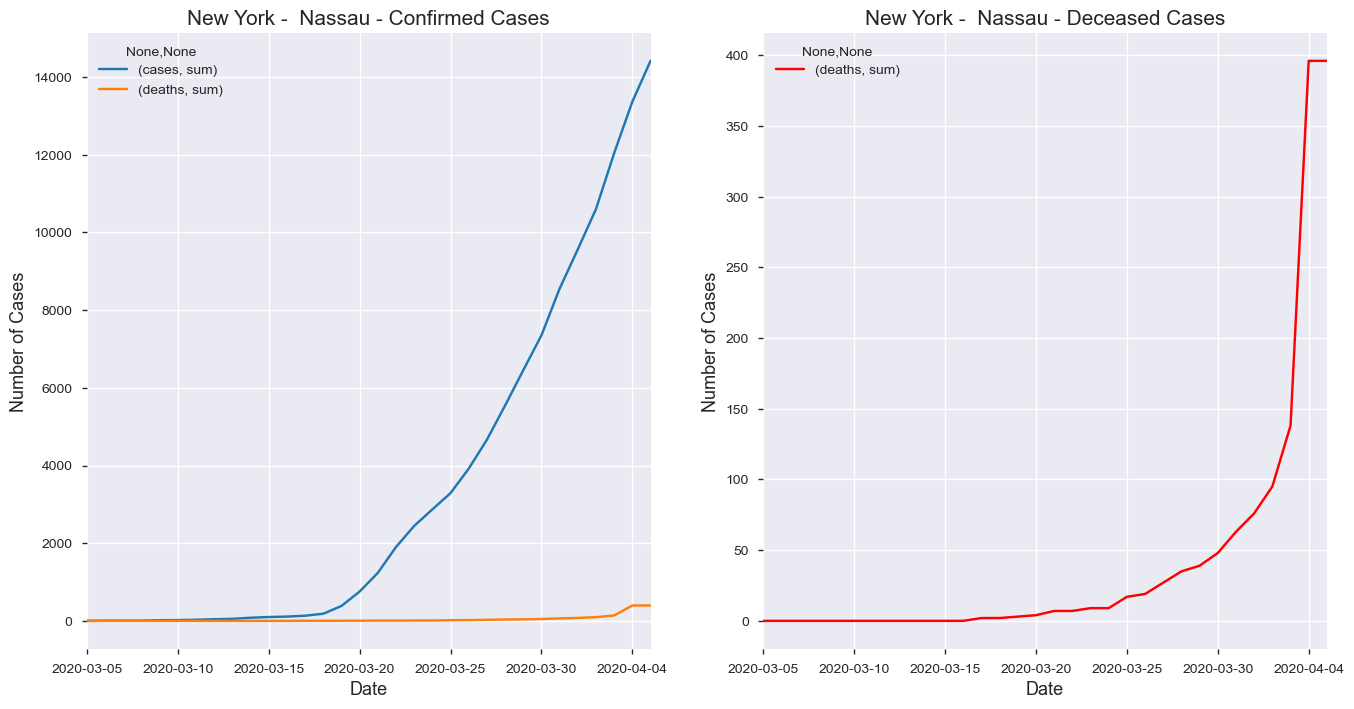

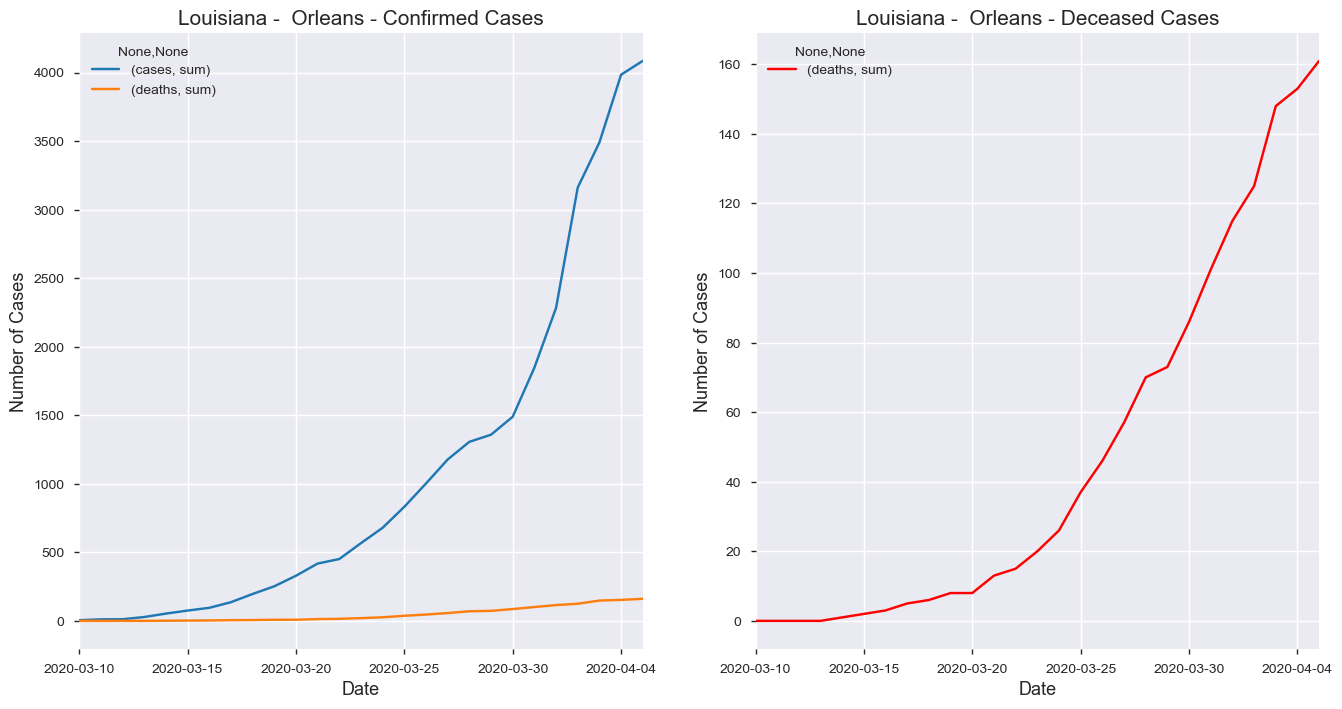

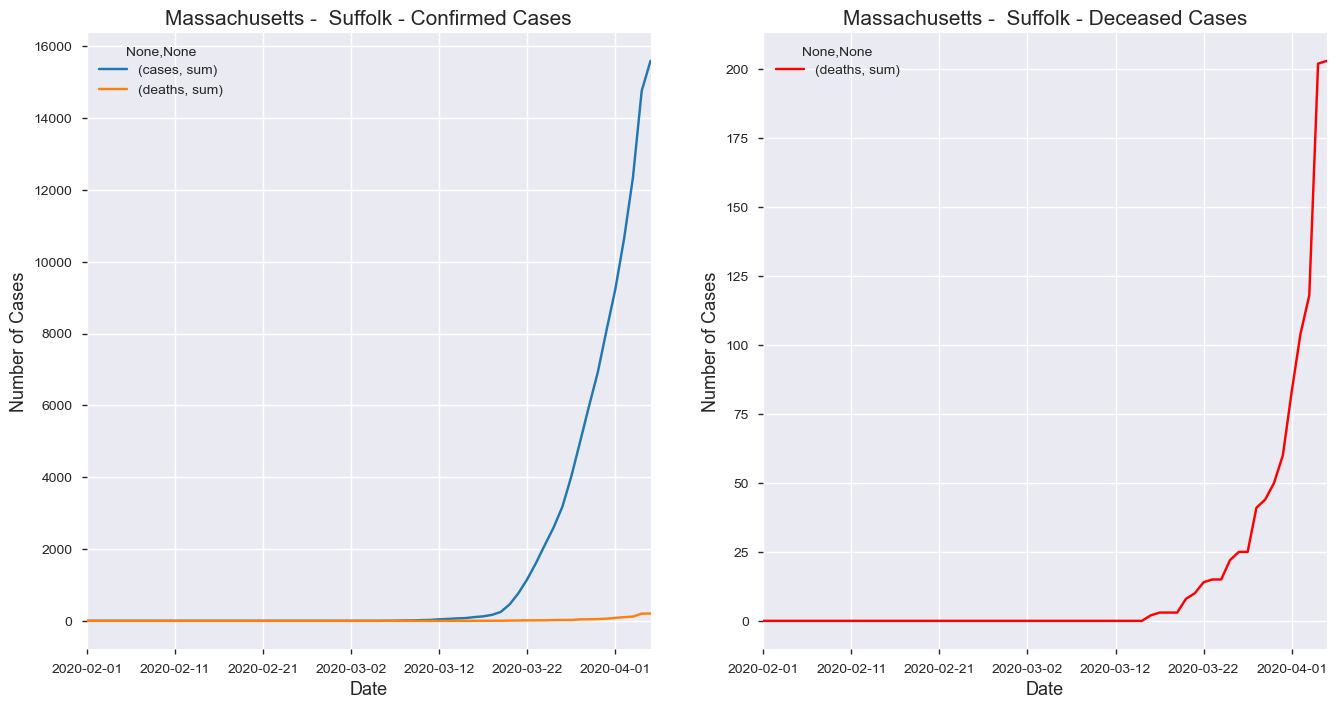

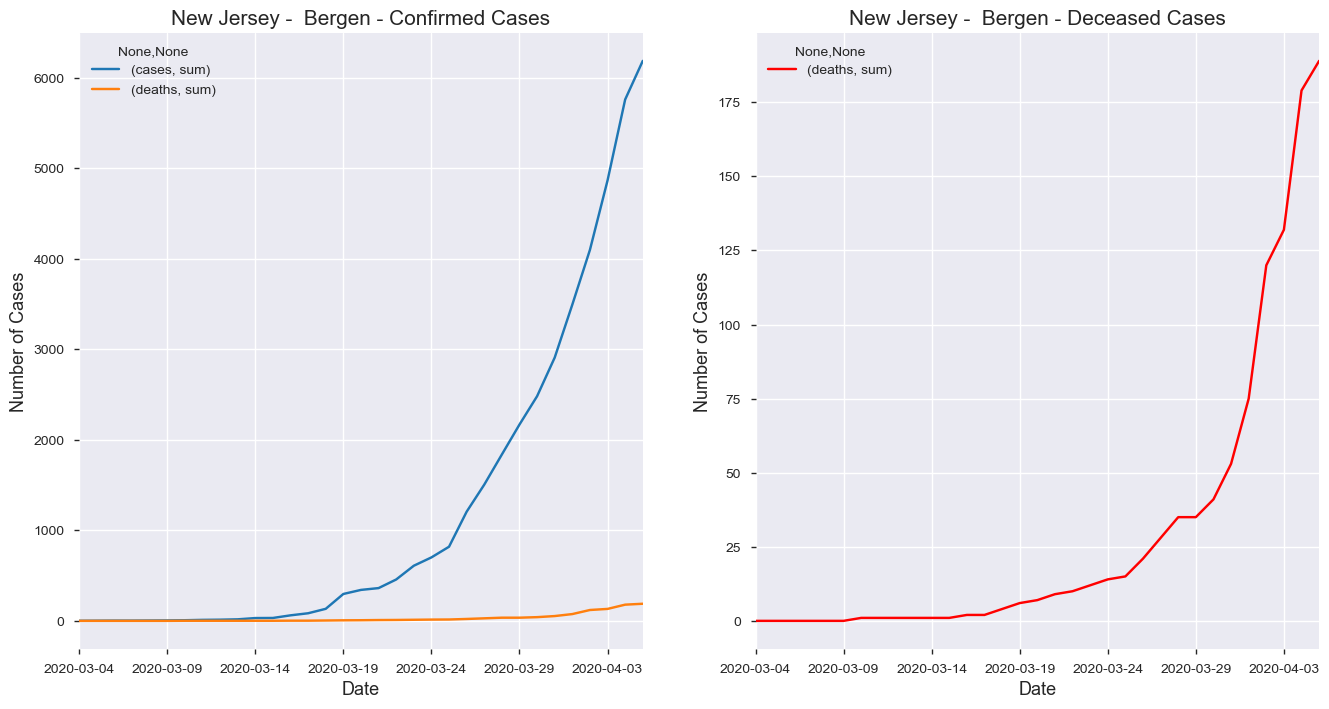

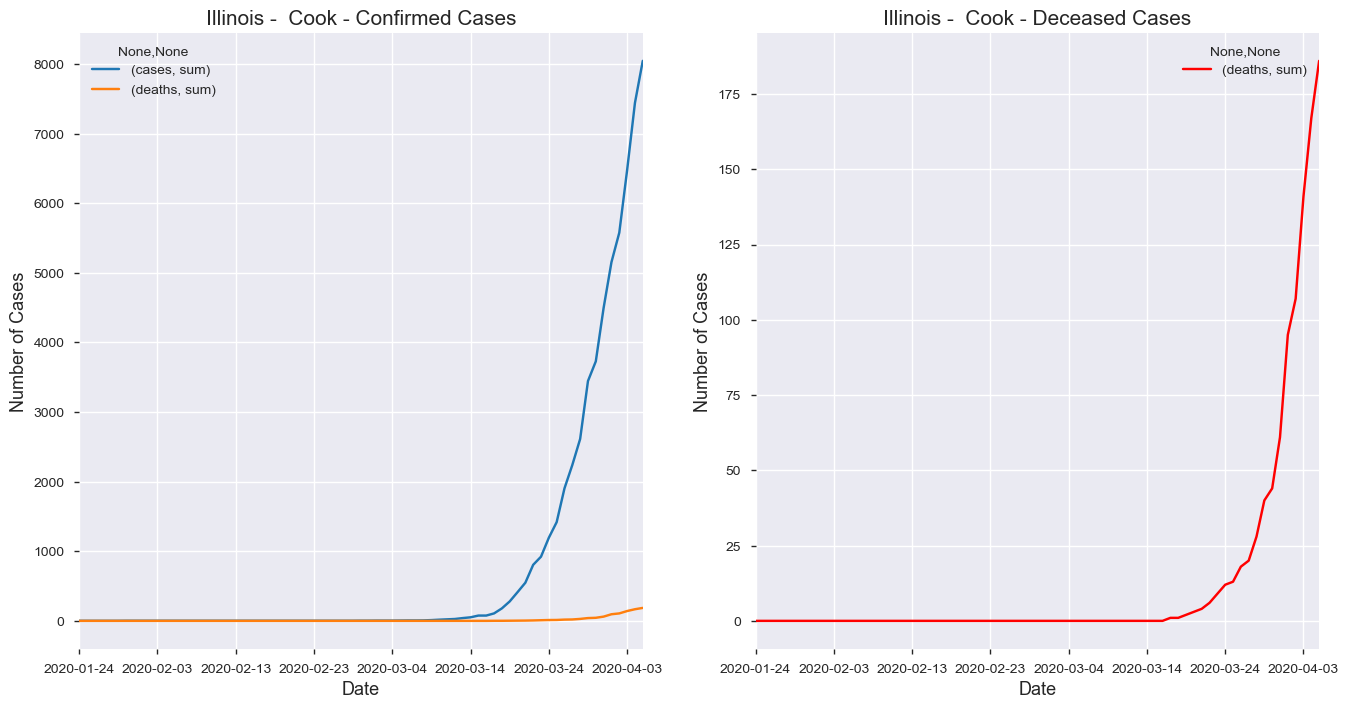

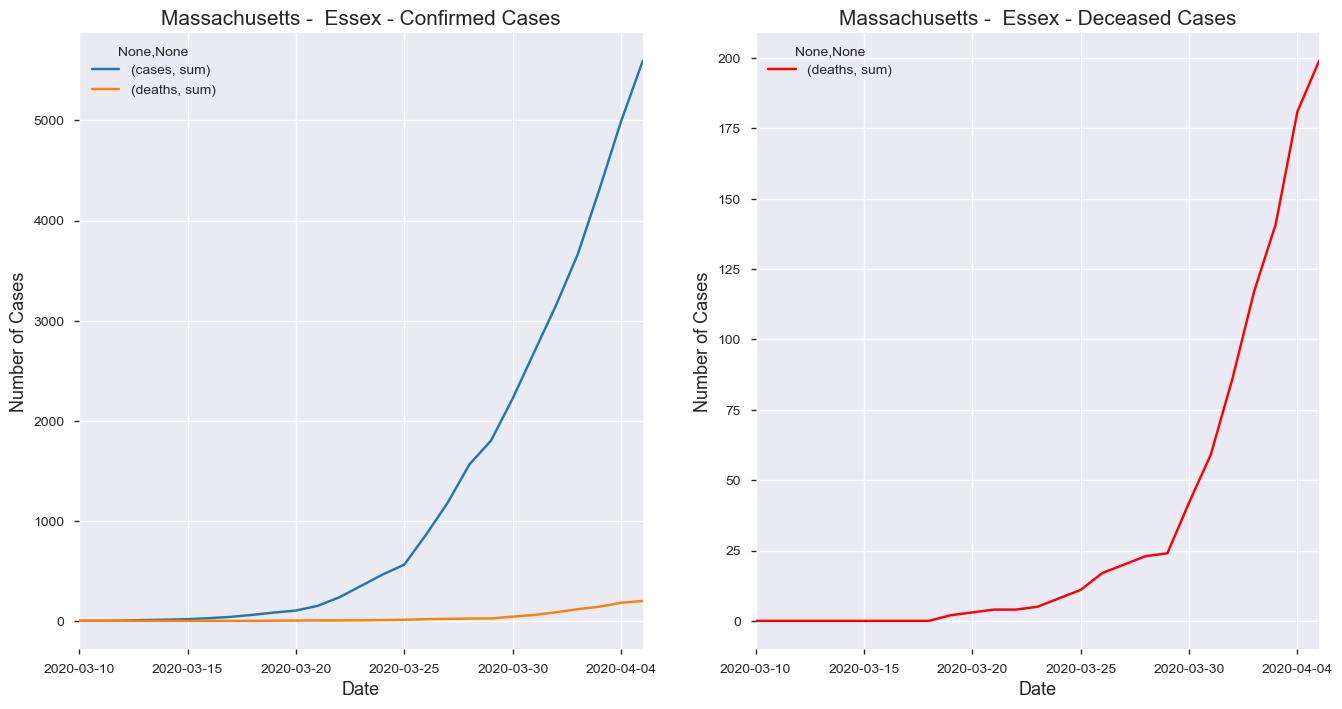

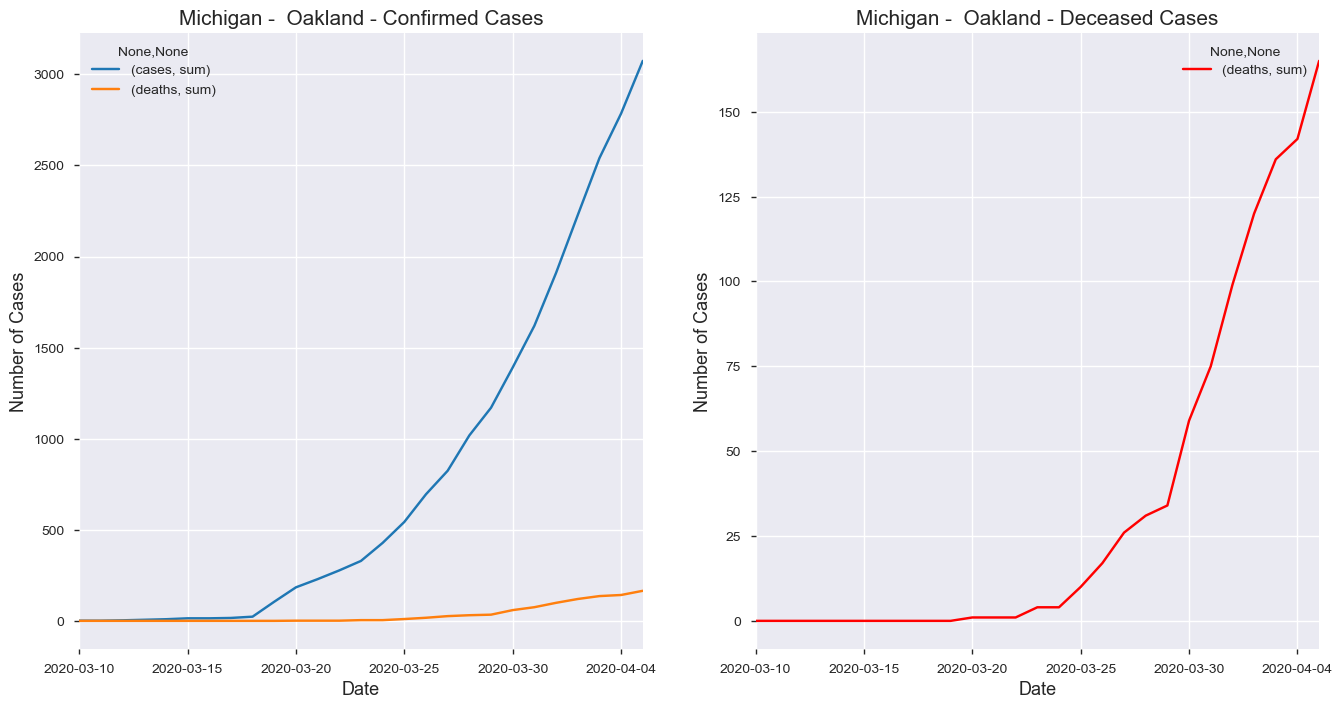

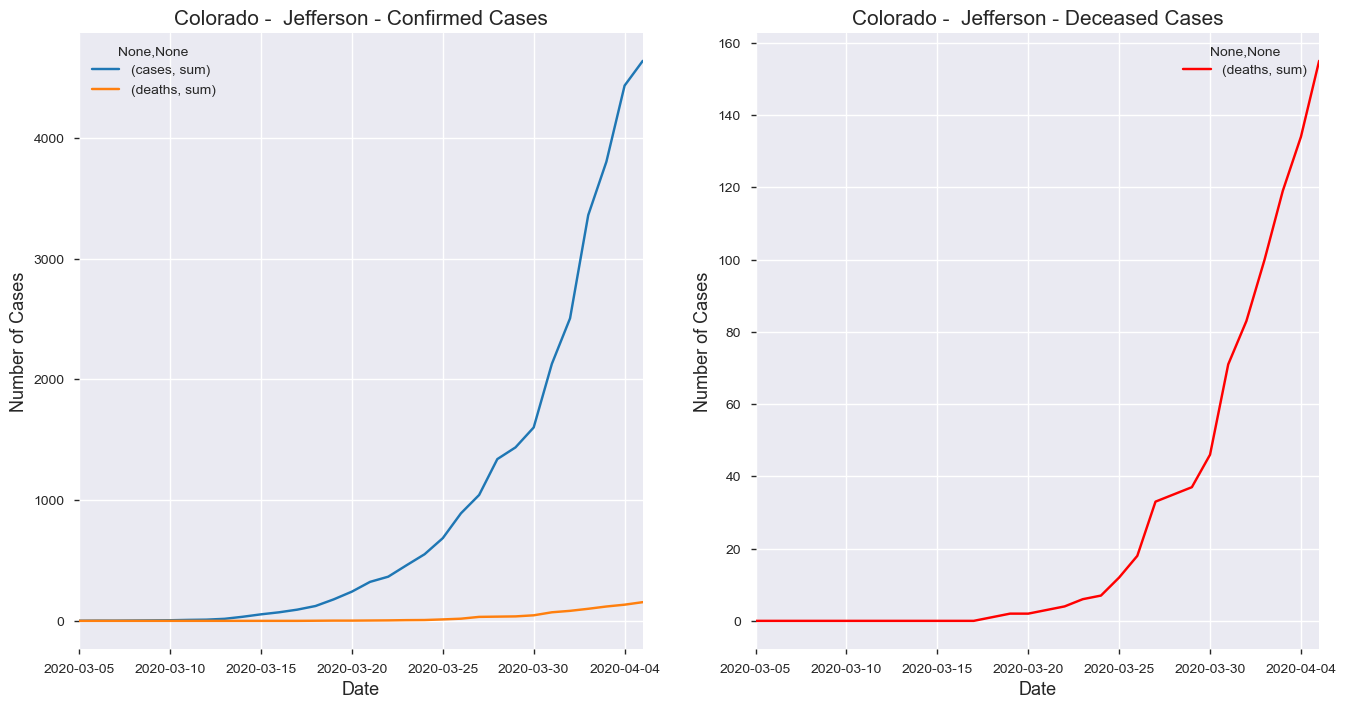

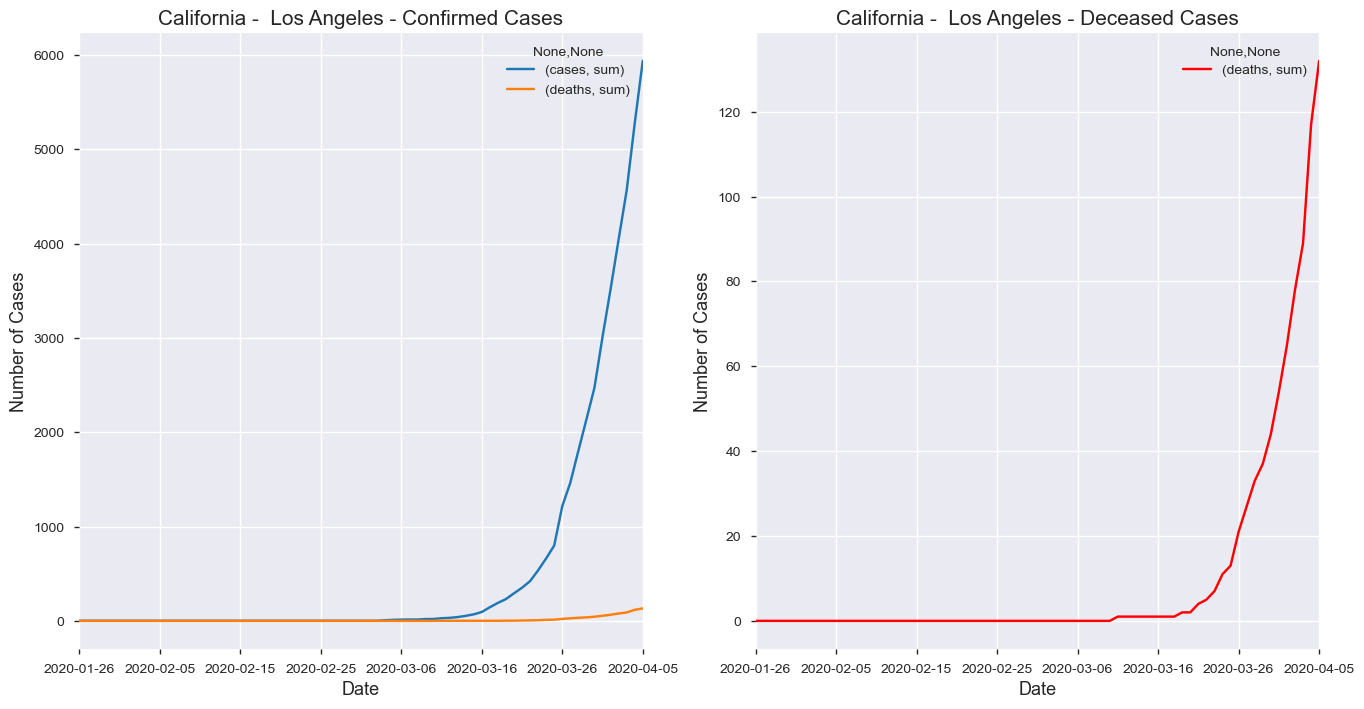

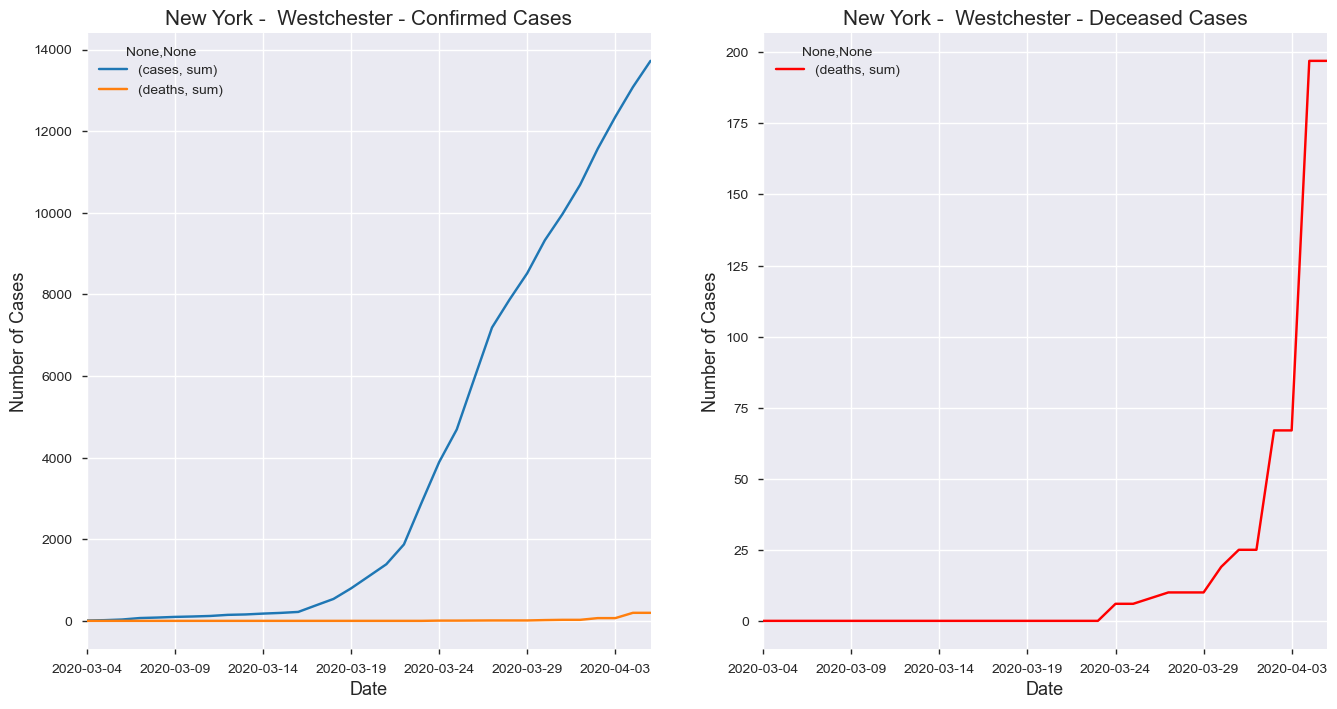

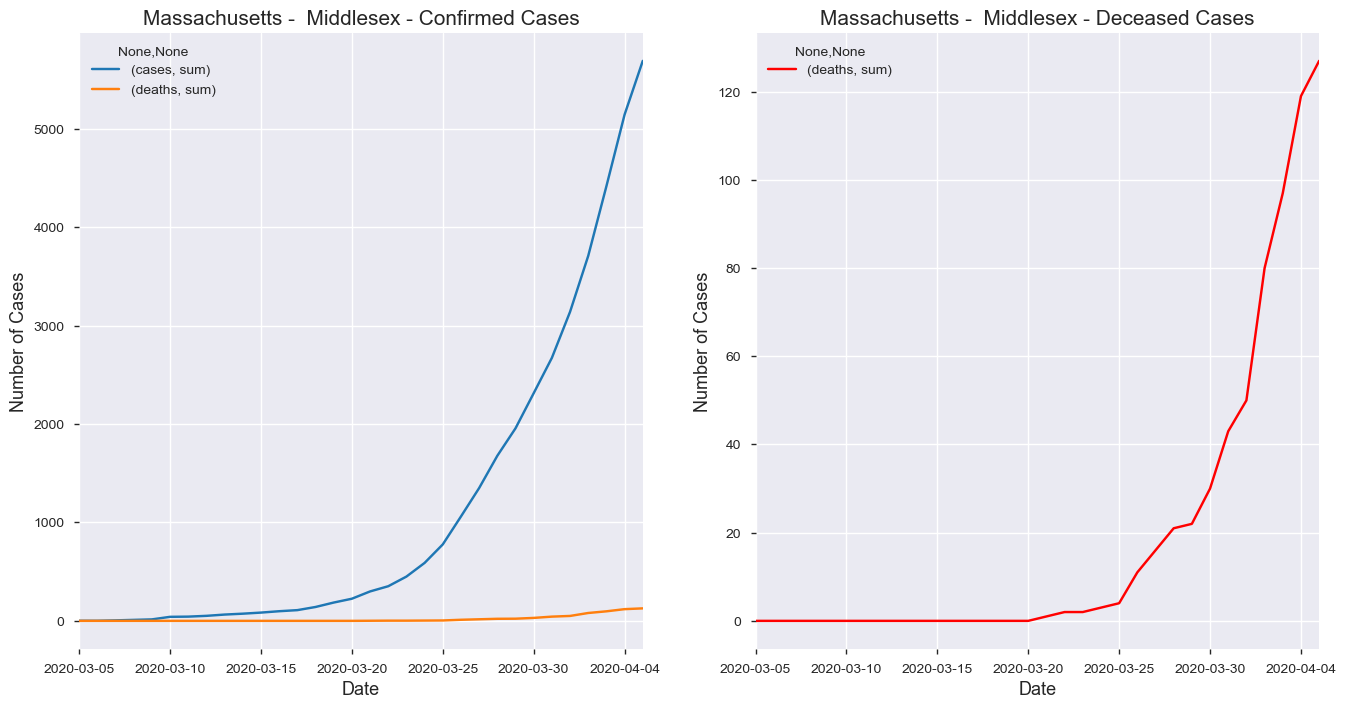

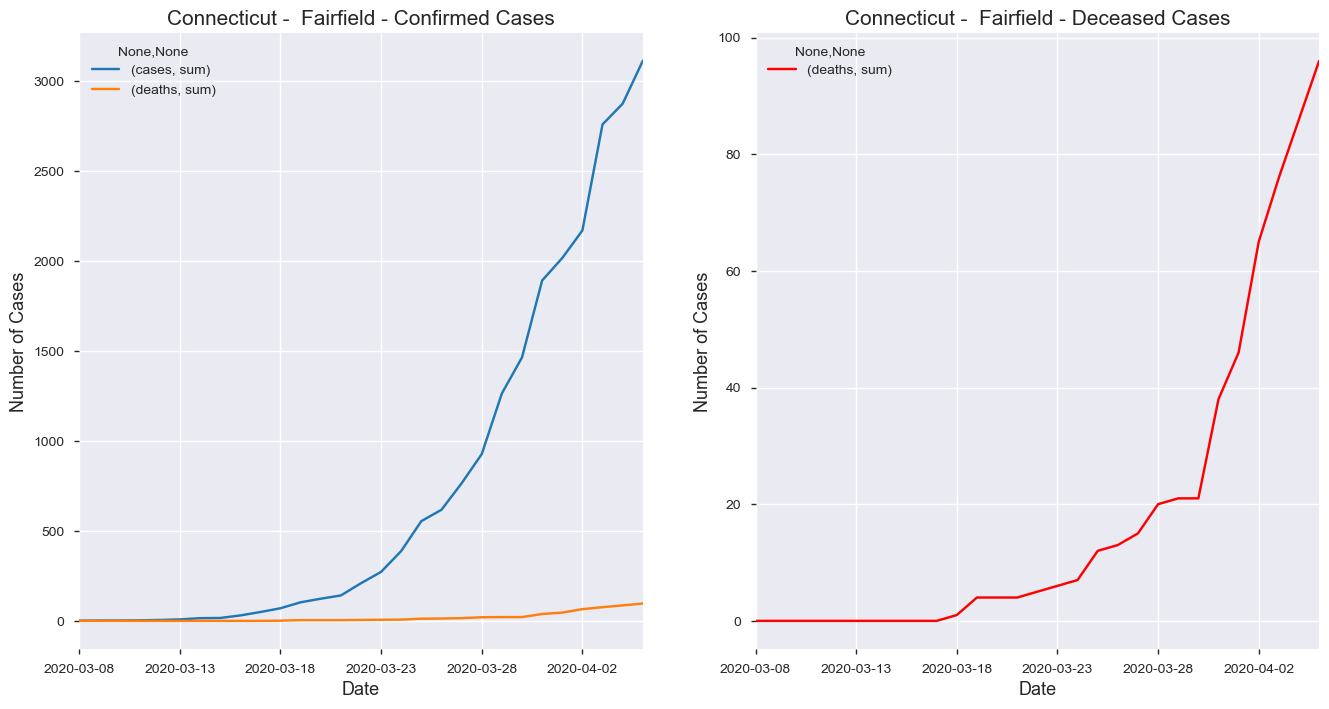

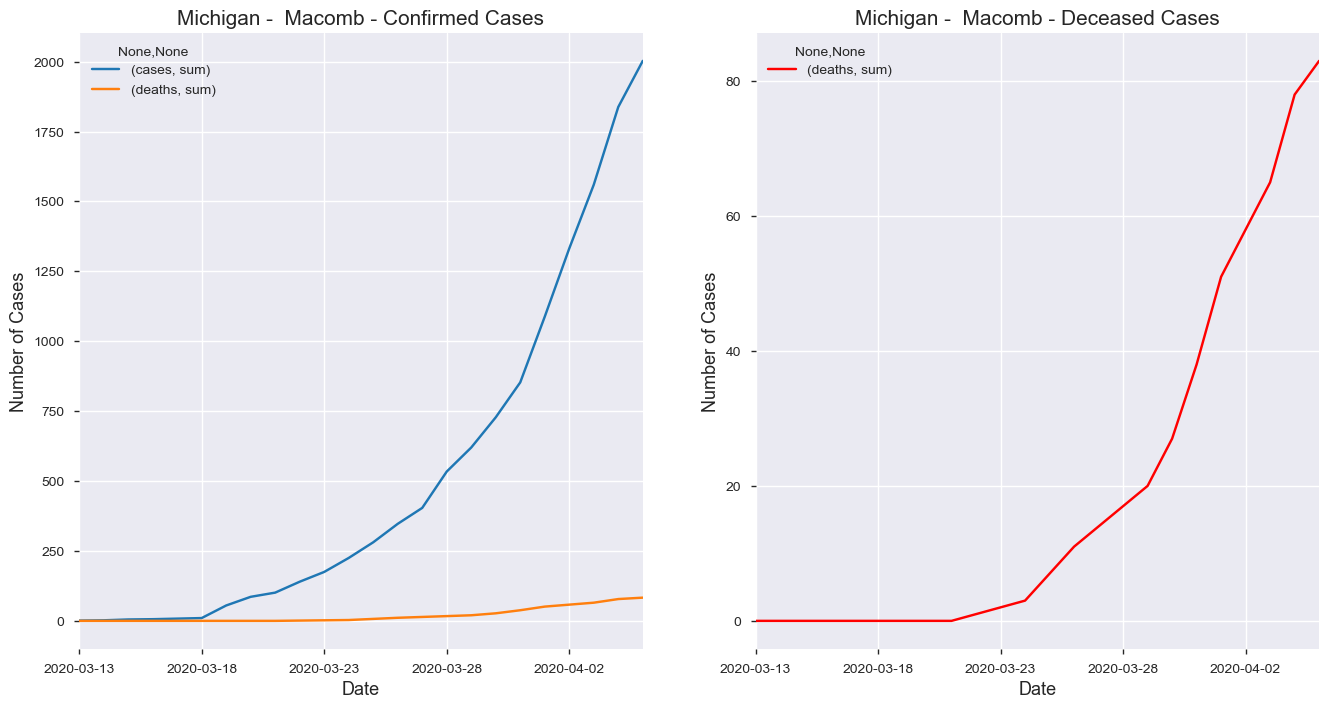

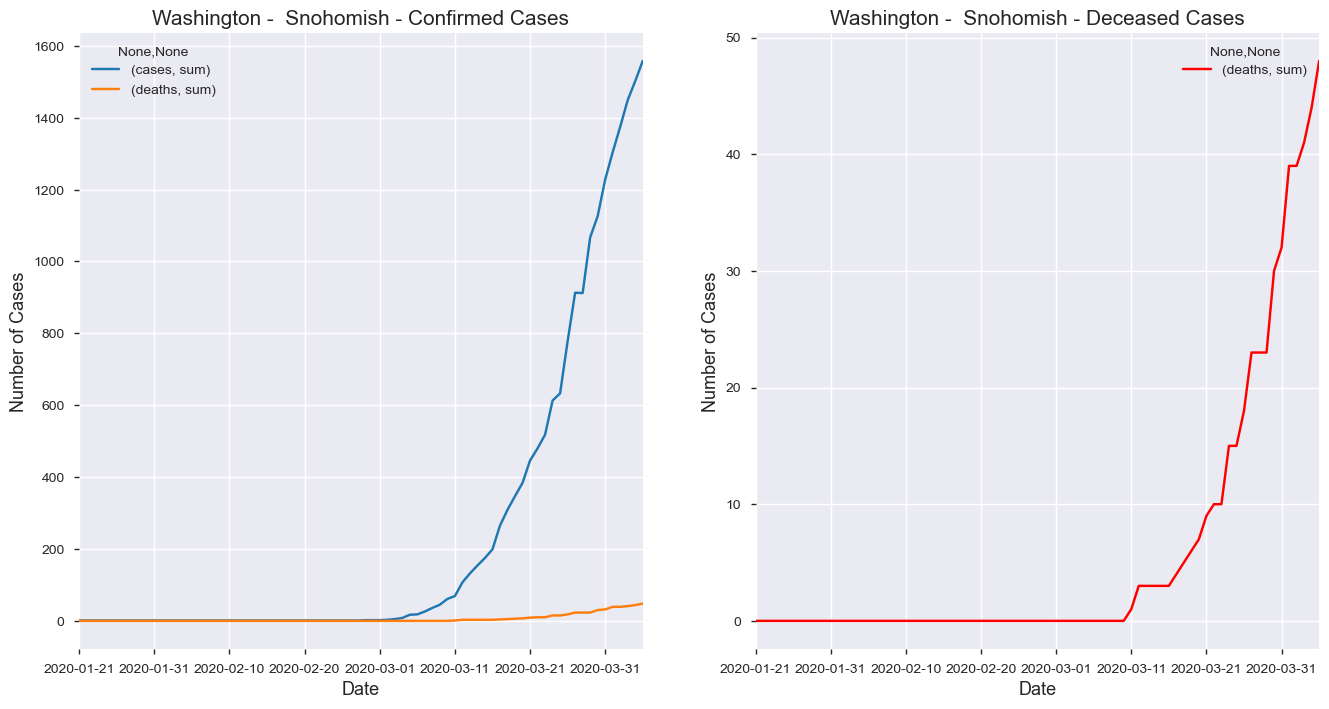

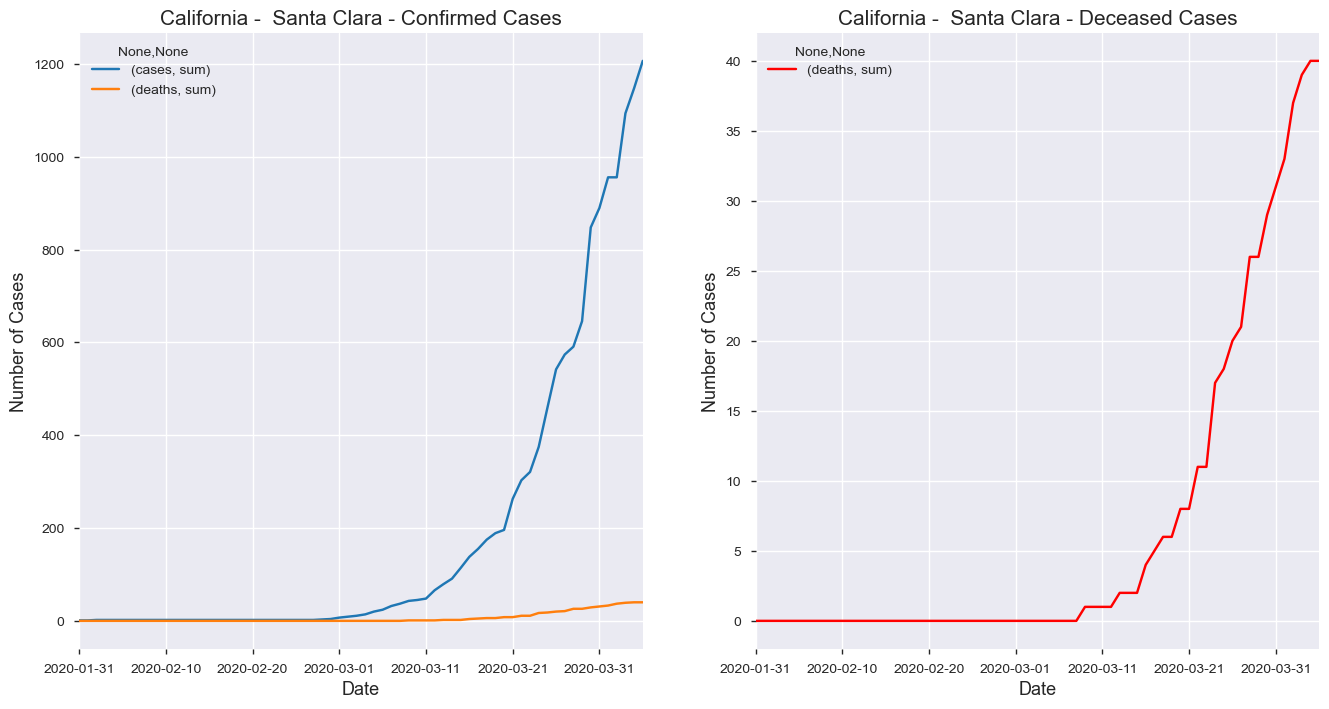

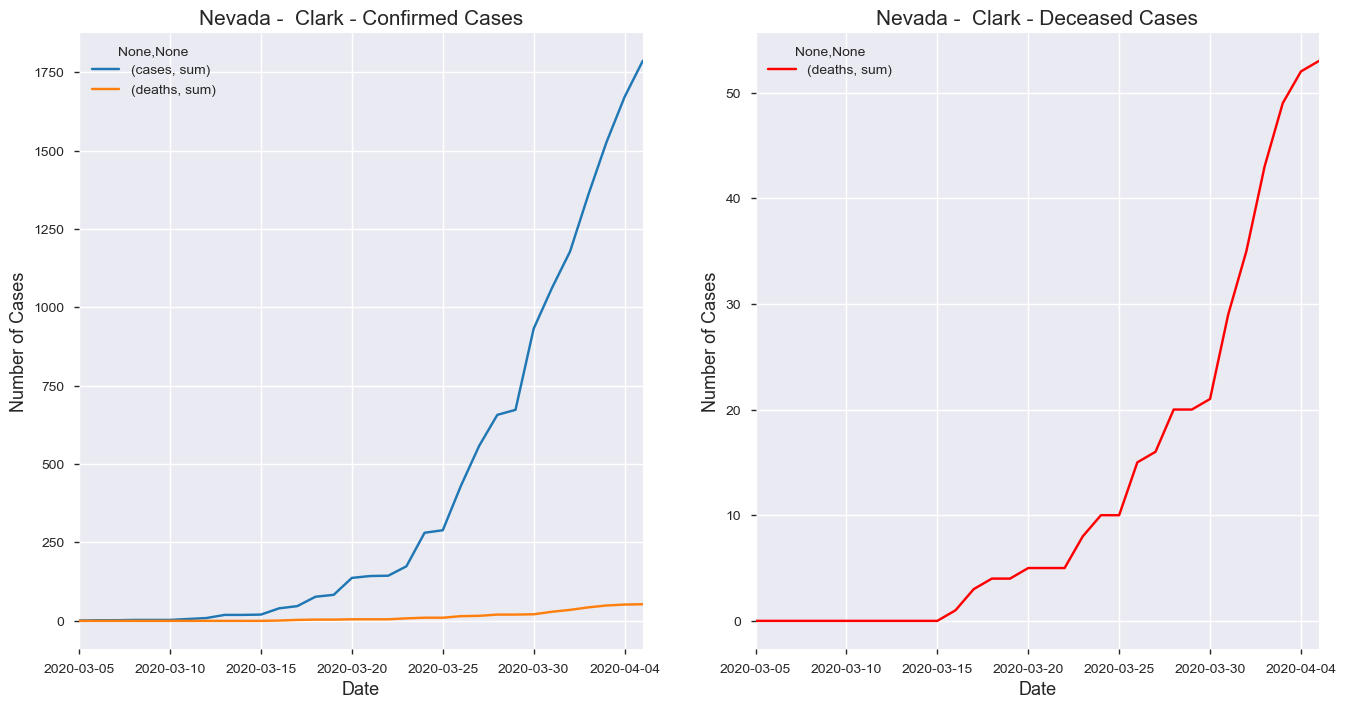

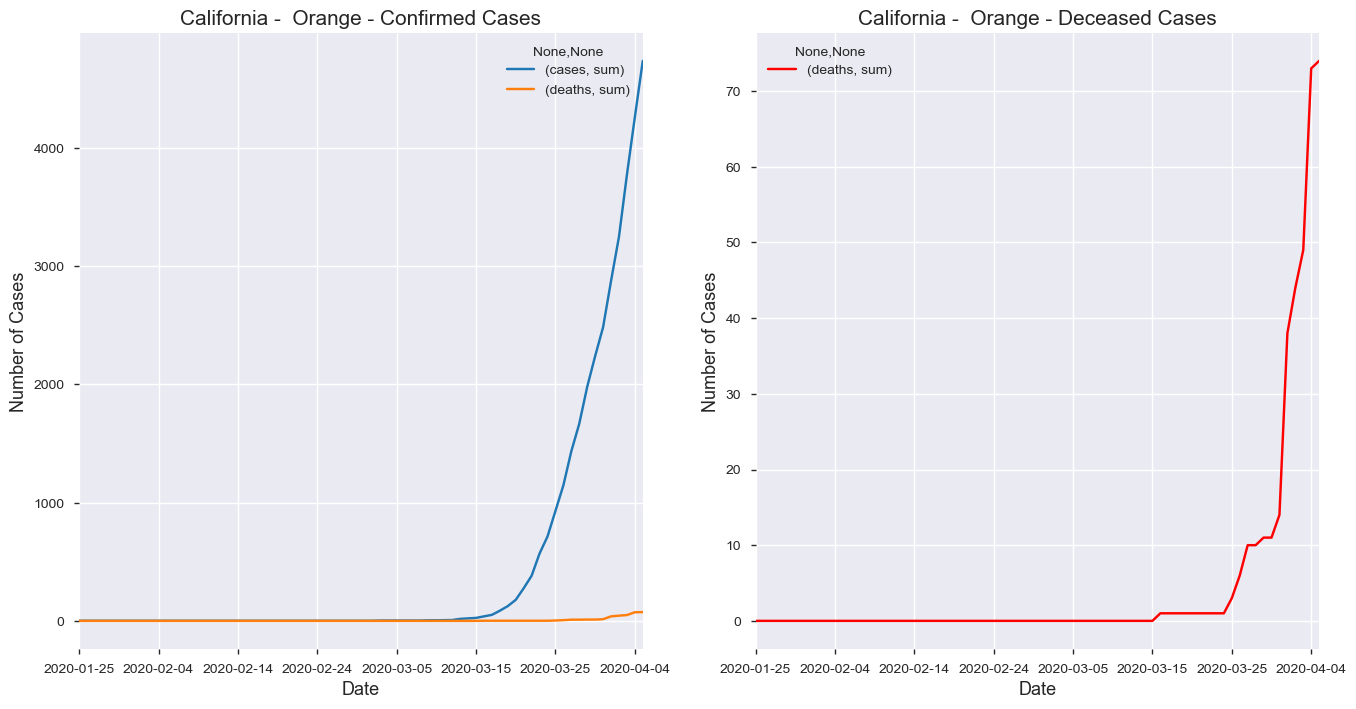

In [59]:
for i in range(0,len(top_counties)):
    plot_target(county_df[county_df.county == top_counties[i]],state=True,county=True)